Data Scientist Challenge LATAM Airlines
======
Autor: Rolf Traeger Brautigam
=========

# Inicio
## Import librarys

In [17]:
# ! conda install plotnine
# ! conda install pandas
! conda install scikit-learn
# ! conda install -c anaconda git


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from plotnine import (
ggplot,
geom_histogram,
aes,
geom_col,
theme,
element_text,
ggtitle,
scale_x_discrete,
facet_grid,
position_dodge,
)

## Funciones utiles

In [4]:
import exploratory_lib as exp_lib

In [5]:
dic_med=exp_lib.class_diccionarios()
dic_med.set_list_num(list(range(1,13)))
dic_med.set_list_name(exp_lib.array_mes_name)
dic_med.set_dictionary()

In [6]:
dic_med.int_to_name(1)

'Enero'

In [7]:
dic_dianom=exp_lib.class_diccionarios()
dic_dianom.set_list_num(list(range(1,8)))
dic_dianom.set_list_name(['Lunes', 'Martes', 'Miercoles','Jueves','Viernes', 'Sabado', 'Domingo'])
dic_dianom.set_dictionary()
dic_dianom.name_to_num("LuneS")

1

## Extract CSV y transform using owns librarys

In [7]:
try:        # Modifica desde el csv synthetic_features
    df_total = exp_lib.extract_csv("data","synthetic_features",',')
    print("Extract complete : synthetic_features")
    df_total["date_i"] = df_total["date_i"].apply(exp_lib.convert_to_date)
    df_total["date_o"] = df_total["date_o"].apply(exp_lib.convert_to_date)
    df_total["mes_name"]=df_total.MES.astype("int16").apply(dic_med.int_to_name)
    exp_lib.columns_cast(df_total,['DIA', 'MES', 'AÑO', 'min_diff', 'delay_15'],"float16")
    # data_scl = transformacion_final(df_total)
except:         # Modifica desde el origen
    print("La tabla no ha sido creada aún")
    df_total = exp_lib.extract_csv("data","dataset_SCL",',')
    df_total = df_total.reset_index()
    df_total=df_total.rename(columns= {'index':"id_vuelo"})
    df_total = exp_lib.additional_columns(df_total)
    df_total.to_csv('data/synthetic_features.csv',index=False,sep=",") 
    exp_lib.columns_cast(df_total,['DIA', 'MES', 'AÑO', 'min_diff', 'delay_15'],"float16")
    df_total["mes_name"]=df_total.MES.astype("int16").apply(dic_med.int_to_name)
    # data_scl = transformacion_final(df_total)

df_total.head(2)

Dimensiones: (68206, 25)
Columnas 
 id_vuelo, Fecha-I, Vlo-I, Ori-I, Des-I, Emp-I, Fecha-O, Vlo-O, Ori-O, Des-O, Emp-O, DIA, MES, AÑO, DIANOM, TIPOVUELO, OPERA, SIGLAORI, SIGLADES, date_i, date_o, high_season, period_day, min_diff, delay_15
Extract complete : synthetic_features
id_vuelo               object
Fecha-I                object
Vlo-I                  object
Ori-I                  object
Des-I                  object
Emp-I                  object
Fecha-O                object
Vlo-O                  object
Ori-O                  object
Des-O                  object
Emp-O                  object
DIA                   float16
MES                   float16
AÑO                   float16
DIANOM                 object
TIPOVUELO              object
OPERA                  object
SIGLAORI               object
SIGLADES               object
date_i         datetime64[ns]
date_o         datetime64[ns]
high_season            object
period_day             object
min_diff              float16
d

,id_vuelo,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,...,OPERA,SIGLAORI,SIGLADES,date_i,date_o,high_season,period_day,min_diff,delay_15,mes_name
0,0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,...,American Airlines,Santiago,Miami,2017-01-01 23:30:00,2017-01-01 23:33:00,1,night,3.0,0.0,Enero
1,1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,...,American Airlines,Santiago,Miami,2017-01-02 23:30:00,2017-01-02 23:39:00,1,night,9.0,0.0,Enero


# 1 How is the data distributed? Did you find any noteworthy insight to share? What can you conclude about this?

In [8]:
df_total.describe(include="all").T

C:\Users\rolf.traeger.brauti1\AppData\Local\Temp\ipykernel_27236\673917450.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
C:\Users\rolf.traeger.brauti1\AppData\Local\Temp\ipykernel_27236\673917450.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.


,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
id_vuelo,68206,68206,0,1,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fecha-I,68206,53252,2017-07-28 13:30:00,6,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Vlo-I,68206,584,174,686,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ori-I,68206,1,SCEL,68206,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Des-I,68206,64,SCFA,5787,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Emp-I,68206,30,LAN,37611,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fecha-O,68206,62774,2017-11-05 14:51:00,5,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Vlo-O,68205,861,174,649,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ori-O,68206,1,SCEL,68206,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Des-O,68206,63,SCFA,5786,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Histogramas simple

<function matplotlib.pyplot.show(close=None, block=None)>

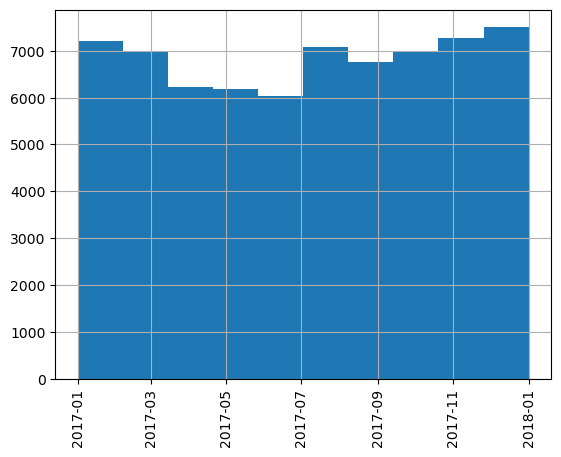

In [9]:
# Histograma de la fecha y hora programada
df_total["date_i"].hist() 
plt.xticks(rotation=90)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

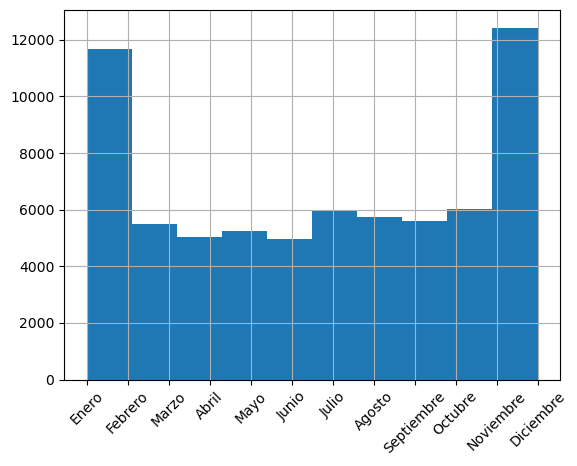

In [10]:
# plt.xticks(rotation=90)
# for i in :
df_total["mes_name"].hist() 
plt.xticks(rotation=45)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

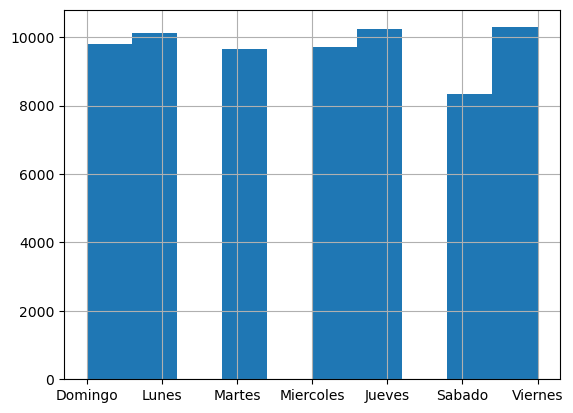

In [11]:
# plt.xticks(rotation=90)
# for i in :
df_total["DIANOM"].hist() 
# plt.xticks(rotation=90)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

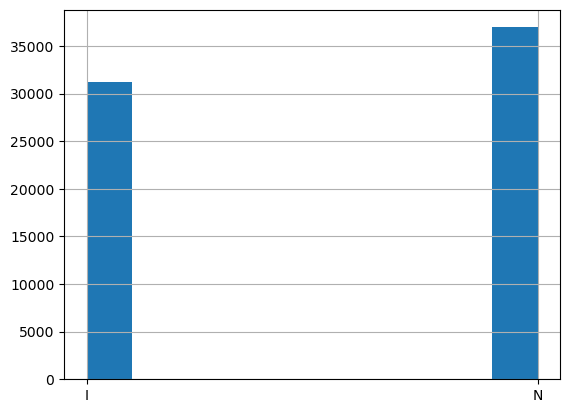

In [12]:
df_total["TIPOVUELO"].hist() 
# plt.xticks(rotation=90)
plt.show

## Codificacion de los operadores

Los operadores, poseen una distinción entre los códigos, ya que el código representa que sub emperesa se hace carga del vuelo. Por ejemplo 
`Grupo LATAM` posee :
`LXP`,
`TAM`,
`LPE`,
`DSM`,
`LNE`,
`LAP`,


In [13]:
# ==========================================
# Destintos más concurridos
# ==========================================
# Permite identificar qué columna 
# representa mejor el destino del vuelo
list_group=[
            "OPERA",        # : "Name of the airline that operates"
            "Emp-O",        # : "Código de la línea aérea del vuelo operado"
            "Emp-I"
            ]
df_relacion_cod_label =exp_lib.group_by_col (
    df_total, list_group,"id_vuelo").reset_index()
print("Distribución cantidad de vuelos por Aerolinea")
# Destino más concurridos y distribuciones de vuelos
df_relacion_cod_label.T

Distribución cantidad de vuelos por Aerolinea


,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
OPERA,Grupo LATAM,Grupo LATAM,Sky Airline,Grupo LATAM,Aerolineas Argentinas,Copa Air,Latin American Wings,Grupo LATAM,JetSmart SPA,Avianca,...,Latin American Wings,Latin American Wings,Grupo LATAM,Aerolineas Argentinas,Grupo LATAM,Grupo LATAM,Austral,Avianca,Grupo LATAM,Grupo LATAM
Emp-O,LAN,LXP,SKU,TAM,ARG,CMP,JMR,LPE,JAT,AVA,...,56R,48O,LXP,AUT,LPE,LAP,ARG,TPU,DSM,LNE
Emp-I,LAN,LAN,SKU,TAM,ARG,CMP,LAW,LAN,JAT,AVA,...,LAW,LAW,LXP,ARG,LPE,TAM,AUT,AVA,DSM,LNE
count_reg,20988,14549,14298,3046,1944,1850,1547,1210,1095,885,...,17,10,9,5,4,3,2,2,2,1


In [14]:
df_relacion_cod_label.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
OPERA,41,23,Grupo LATAM,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Emp-O,41,32,LRC,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Emp-I,41,30,LAN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
count_reg,41.0,NaN,NaN,NaN,1663.560976,4383.016011,1.0,49.0,279.0,806.0,20988.0


<function matplotlib.pyplot.show(close=None, block=None)>

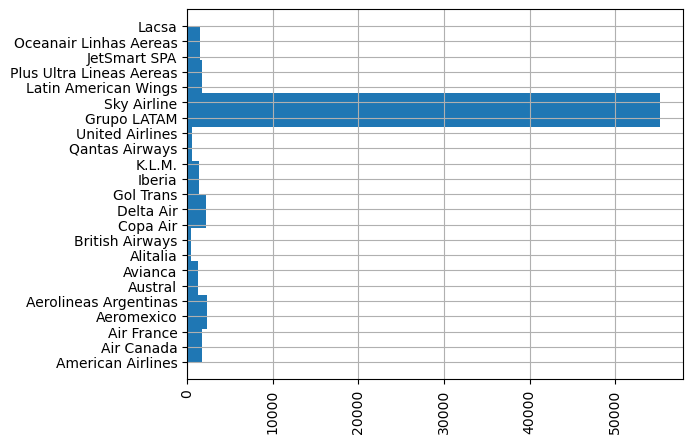

In [15]:
df_total["OPERA"].hist( orientation=u'horizontal') 
plt.xticks(rotation=90)
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

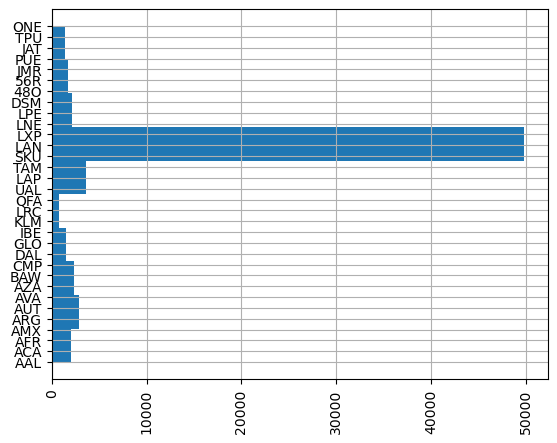

In [16]:
df_total["Emp-O"].hist( orientation=u'horizontal') 
plt.xticks(rotation=90)
plt.show

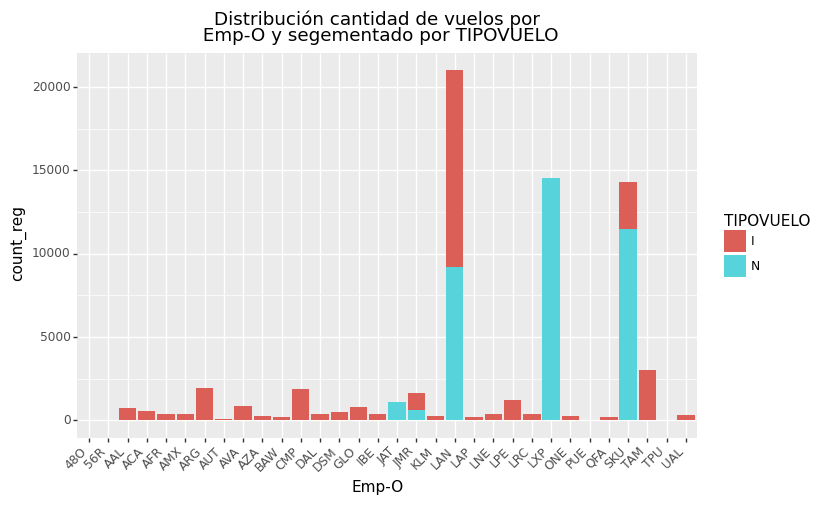

<ggplot: (673509)>

In [17]:
id_lavel ="id_vuelo"
g_x_label="Emp-O"
g_y_label="count_reg"
g_fill_label="TIPOVUELO"
g_title = (f"Distribución cantidad de vuelos por"
           f"\n {g_x_label} y segementado por {g_fill_label}")
df_g_plot =exp_lib.group_by_col(df_total,[g_x_label,g_fill_label],id_lavel).reset_index()
graf_out =(ggplot(df_g_plot, aes(x=g_x_label,
                                y= g_y_label,
                                fill=g_fill_label
                                ))
                                + geom_col()
                            #  +geom_histogram()
                                +ggtitle(g_title)
                                +theme(axis_text_x = 
                                       element_text(angle=45, hjust=1),
                                       figure_size=(8,5))
                                # + scale_x_discrete(limits= exp_lib.array_mes_name)
                )
graf_out

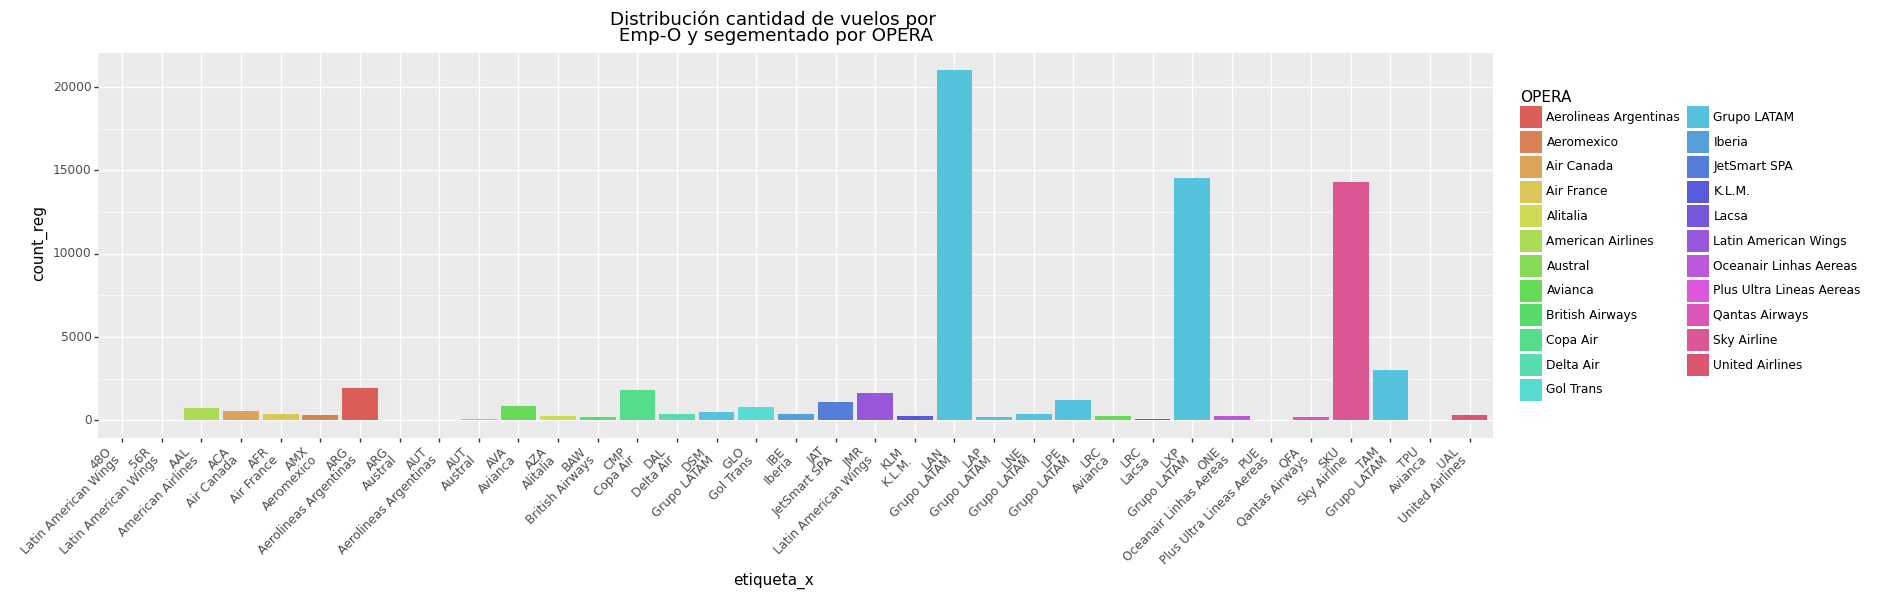

<ggplot: (786562)>

In [18]:
id_lavel ="id_vuelo"
g_x_label="Emp-O"
g_y_label="count_reg"
g_fill_label="OPERA"
g_title = (f"Distribución cantidad de vuelos por"
           f"\n {g_x_label} y segementado por {g_fill_label}")
df_g_plot =exp_lib.group_by_col(df_total,[g_x_label,g_fill_label],id_lavel).reset_index()
df_g_plot['etiqueta_x'] = df_g_plot[g_x_label] + '\n' + df_g_plot[g_fill_label]
graf_out =(ggplot(df_g_plot, aes(x="etiqueta_x",
                                y= g_y_label,
                                fill=g_fill_label
                                ))
                            + geom_col(position=position_dodge(width=0.9))
                            #     + geom_col()
                                +ggtitle(g_title)
                                +theme(axis_text_x = 
                                       element_text(angle=45, hjust=1),
                                       figure_size=(18,5))
                )
graf_out

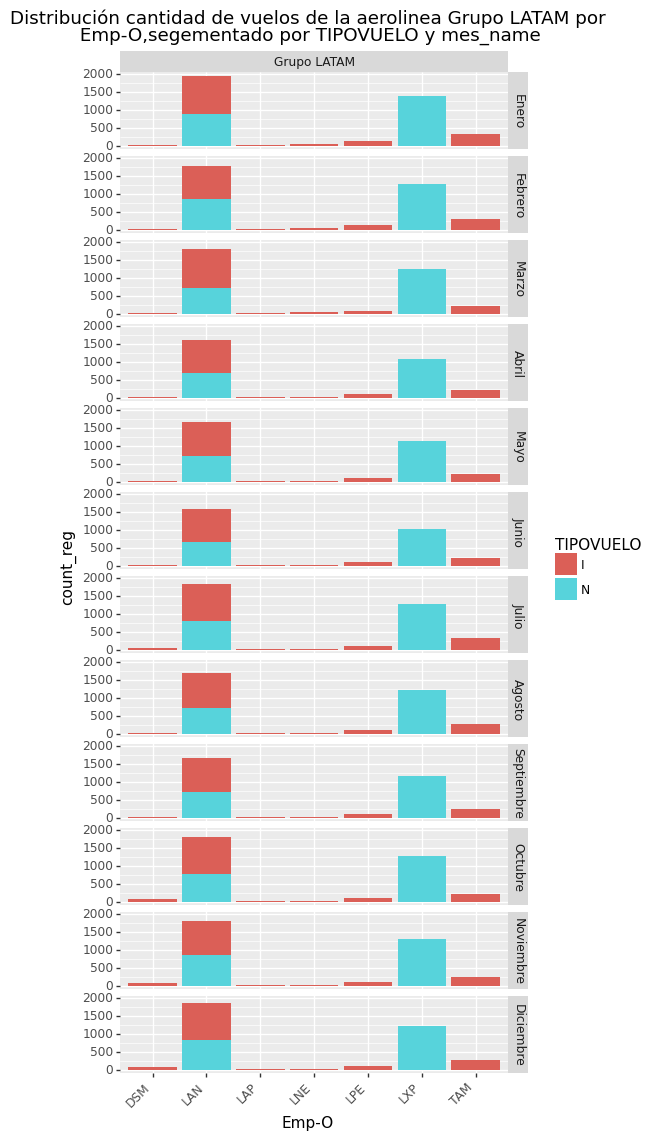

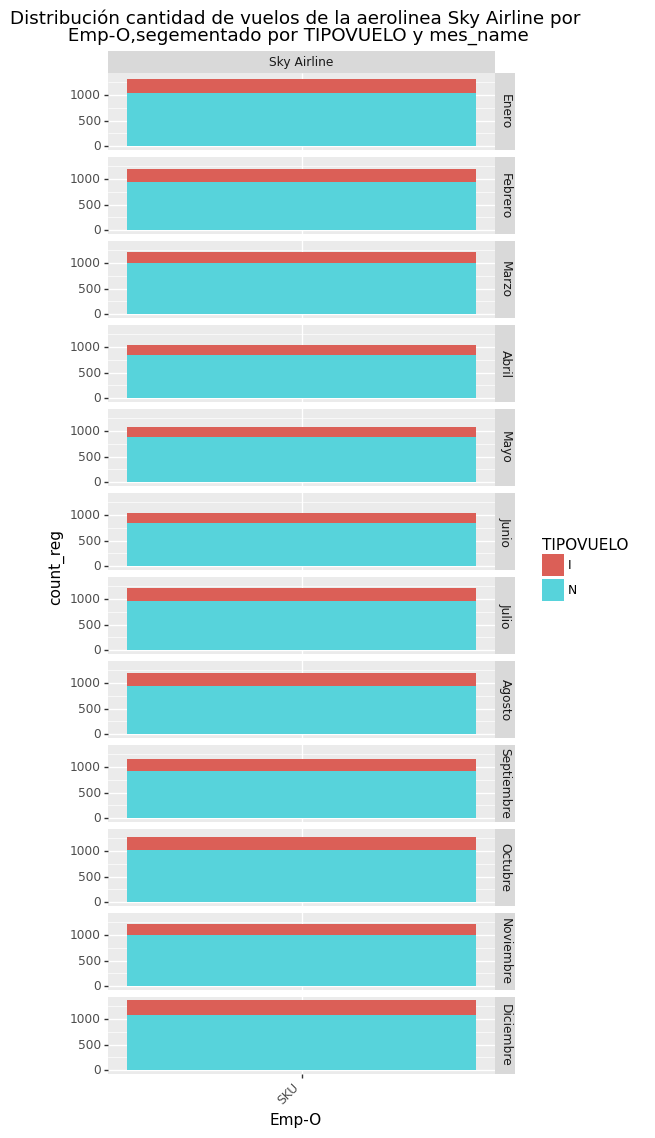

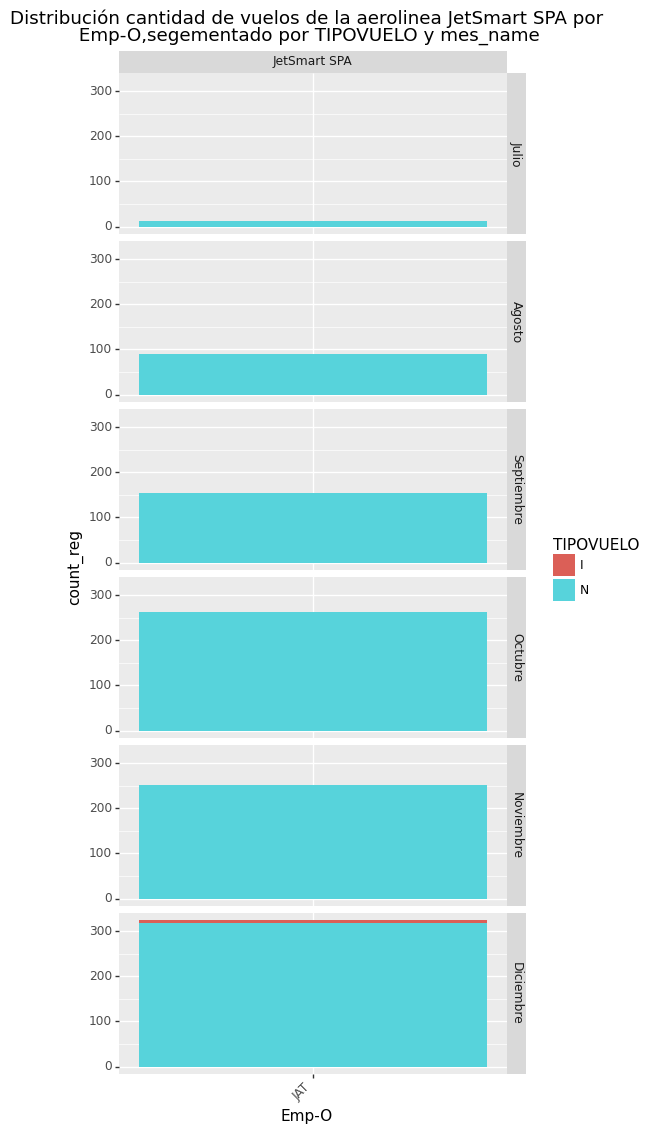

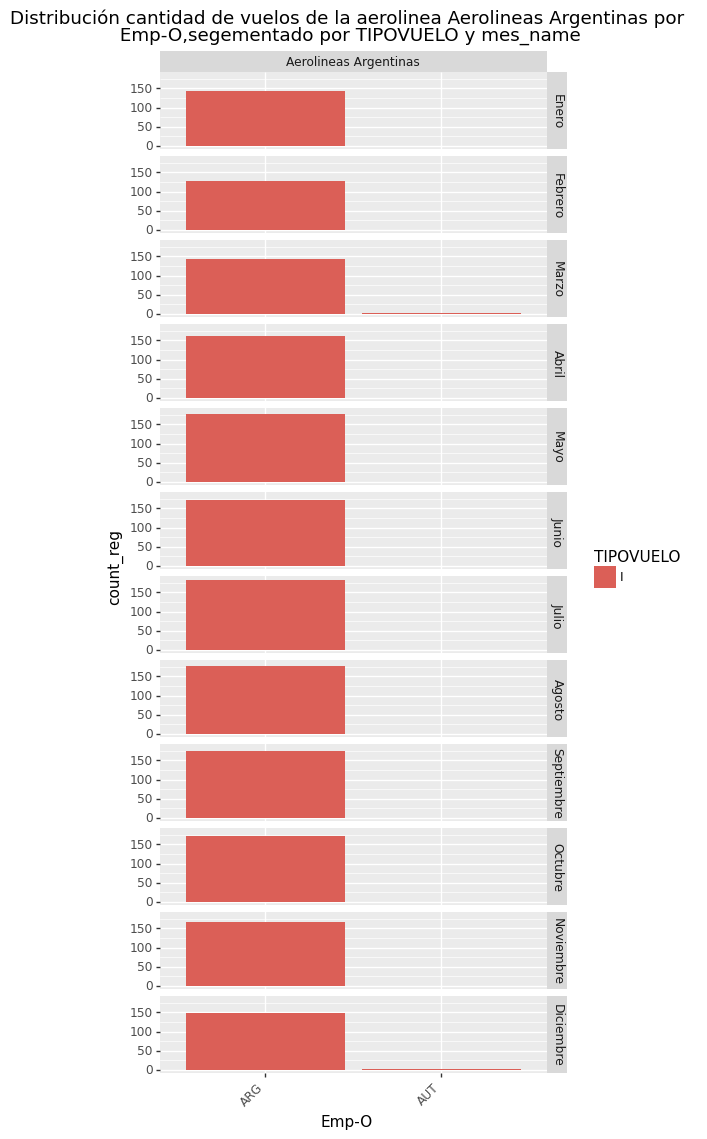

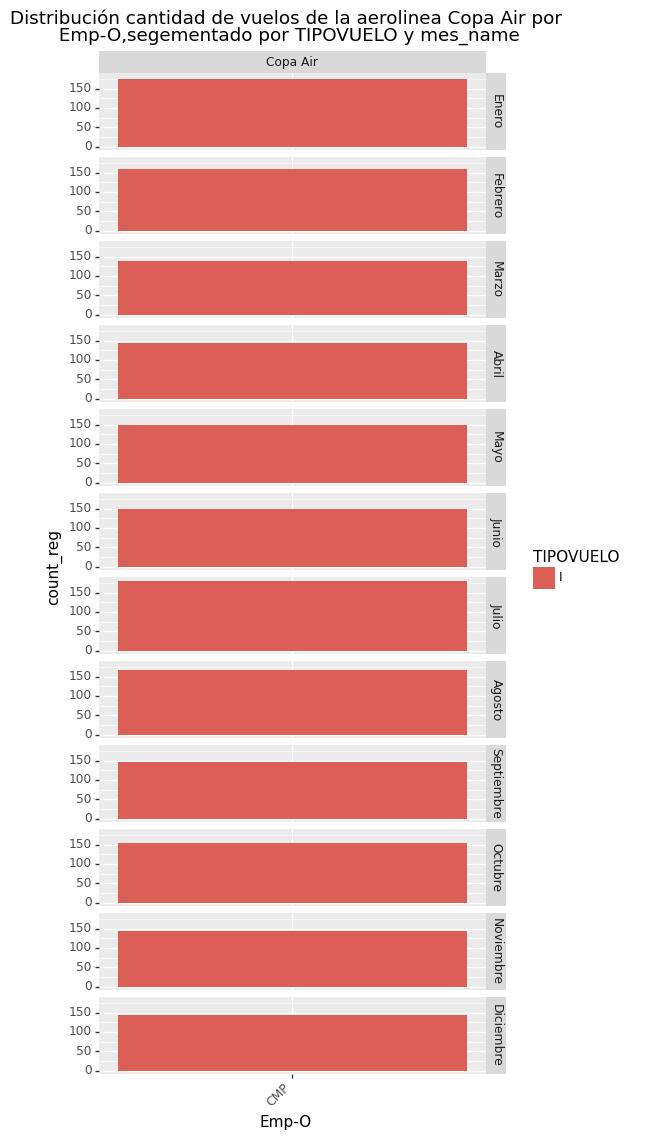

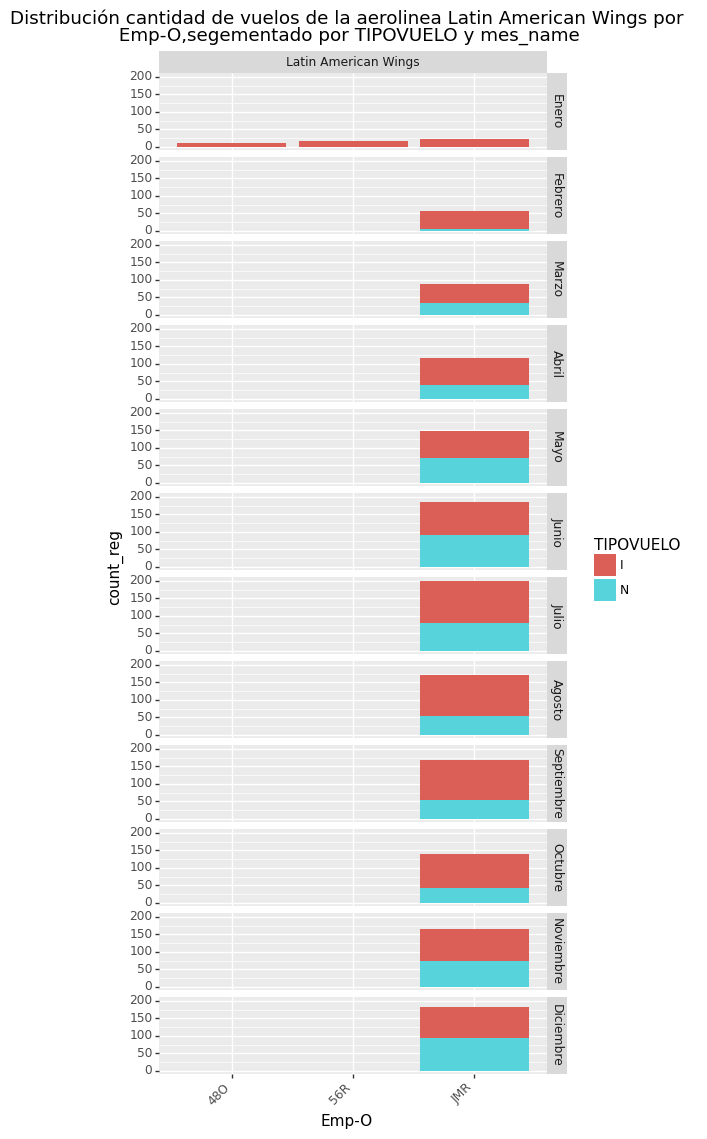

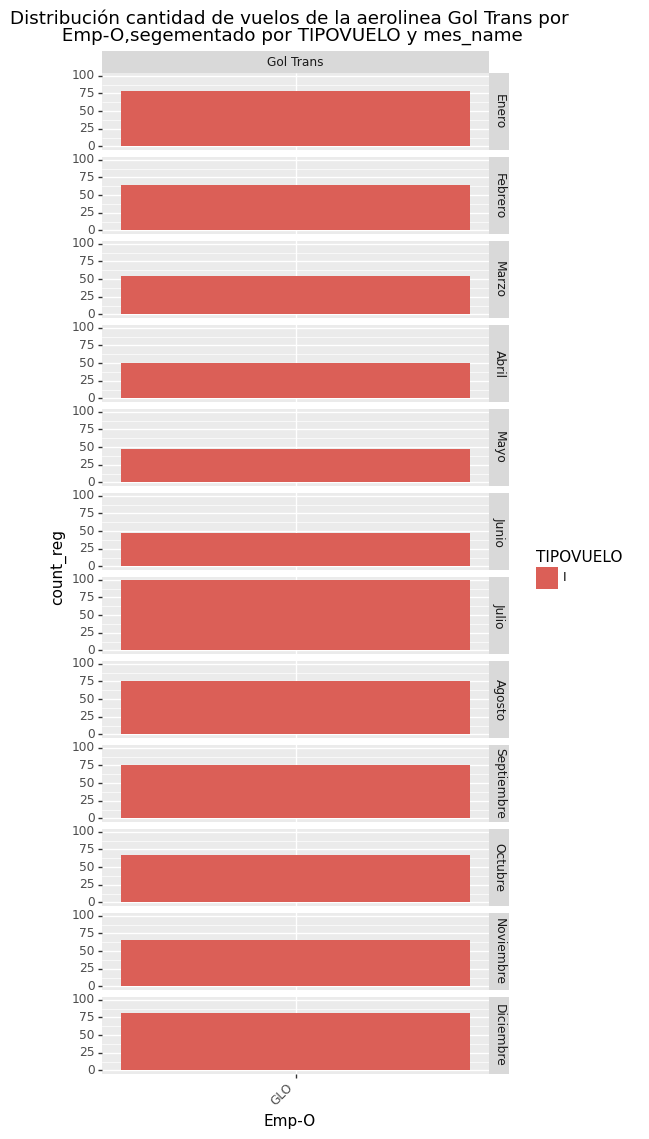

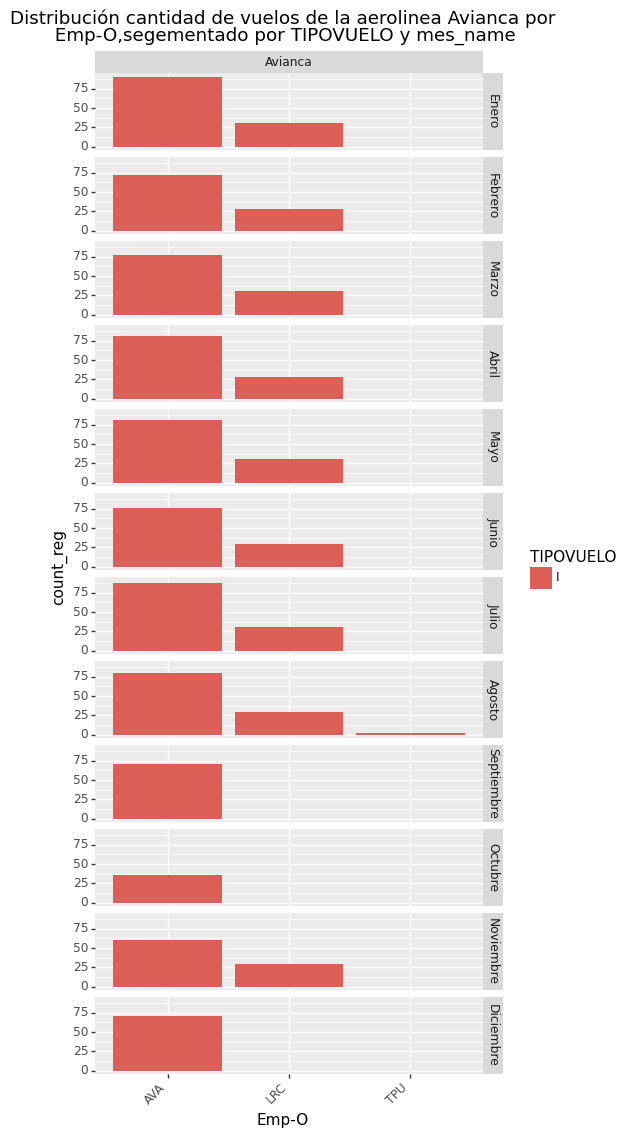

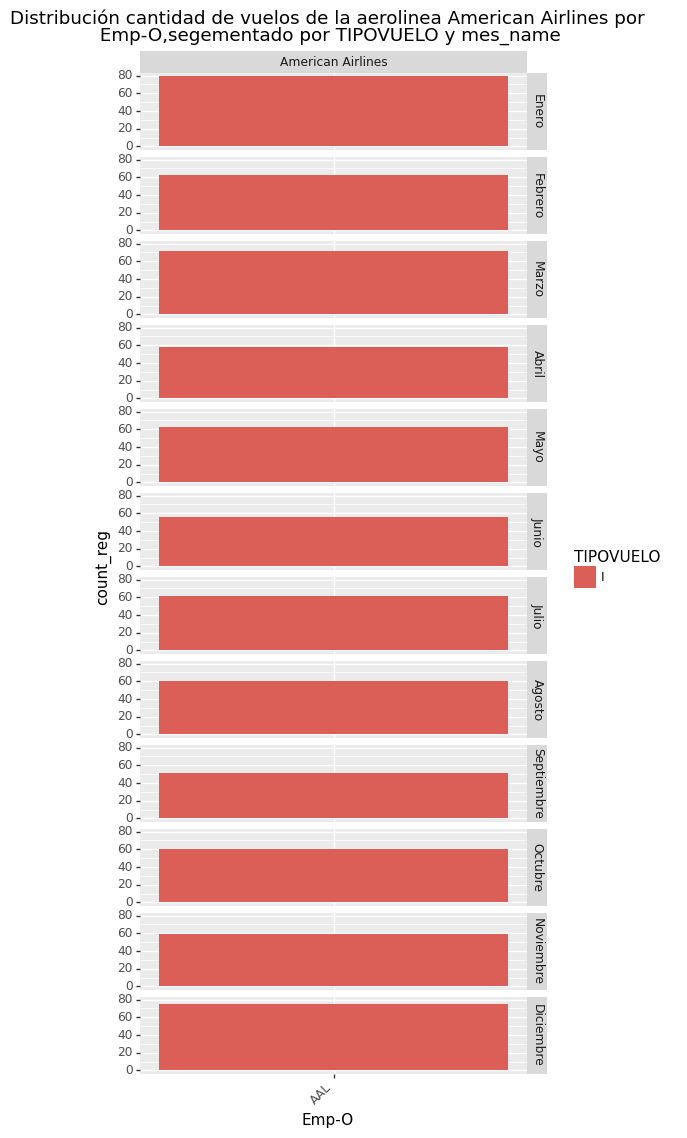

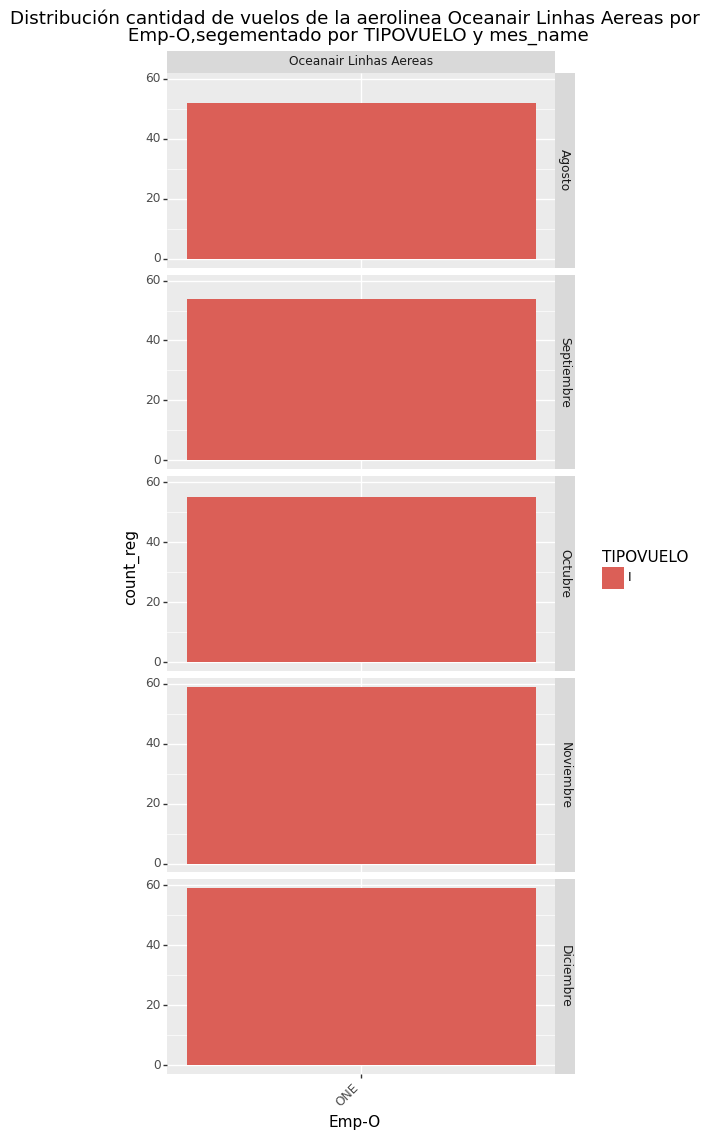

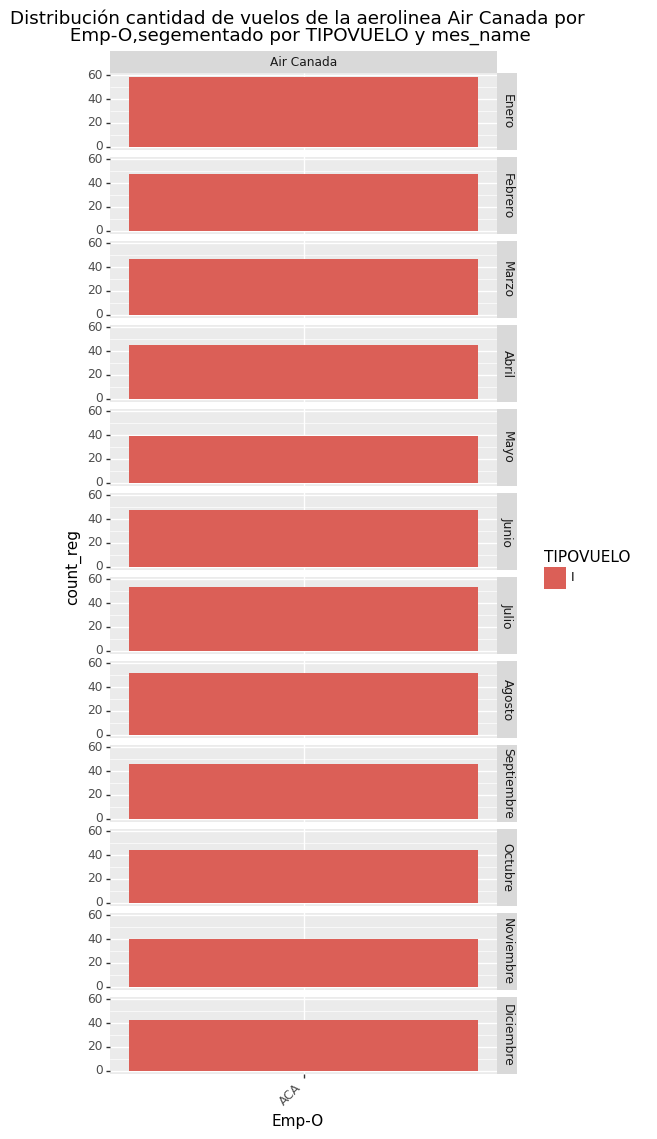

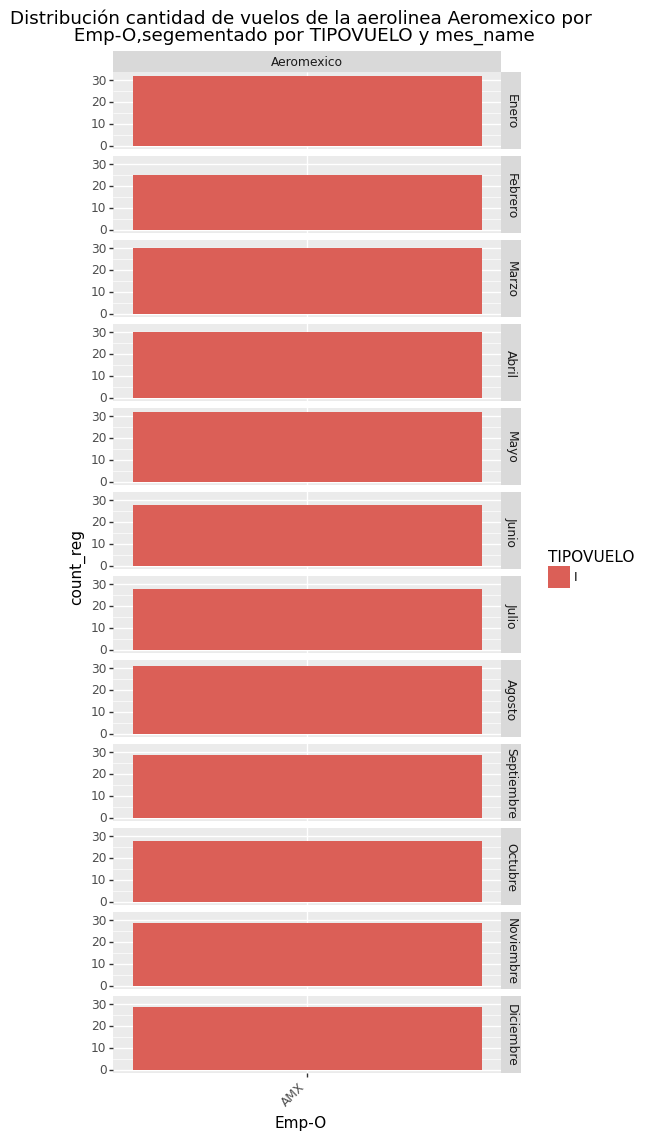

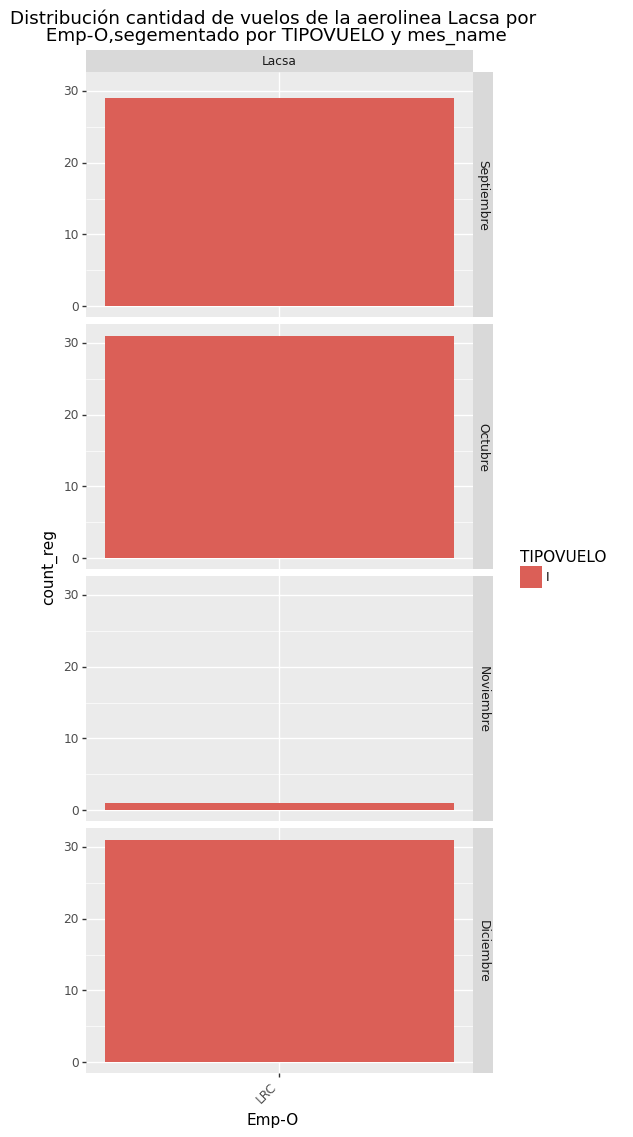

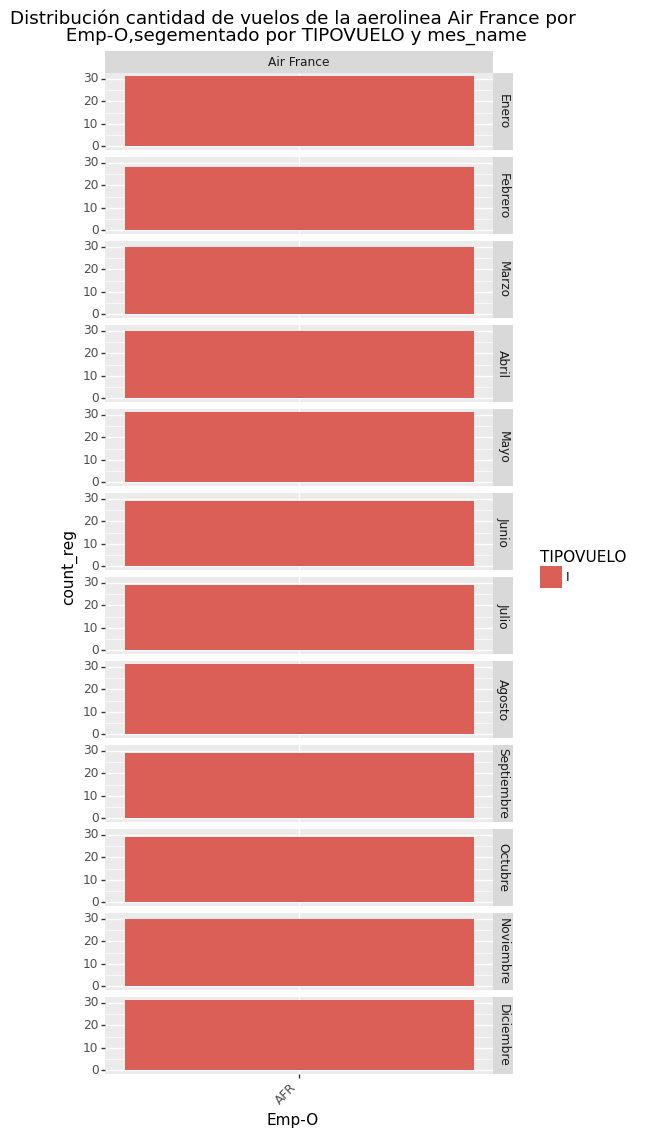

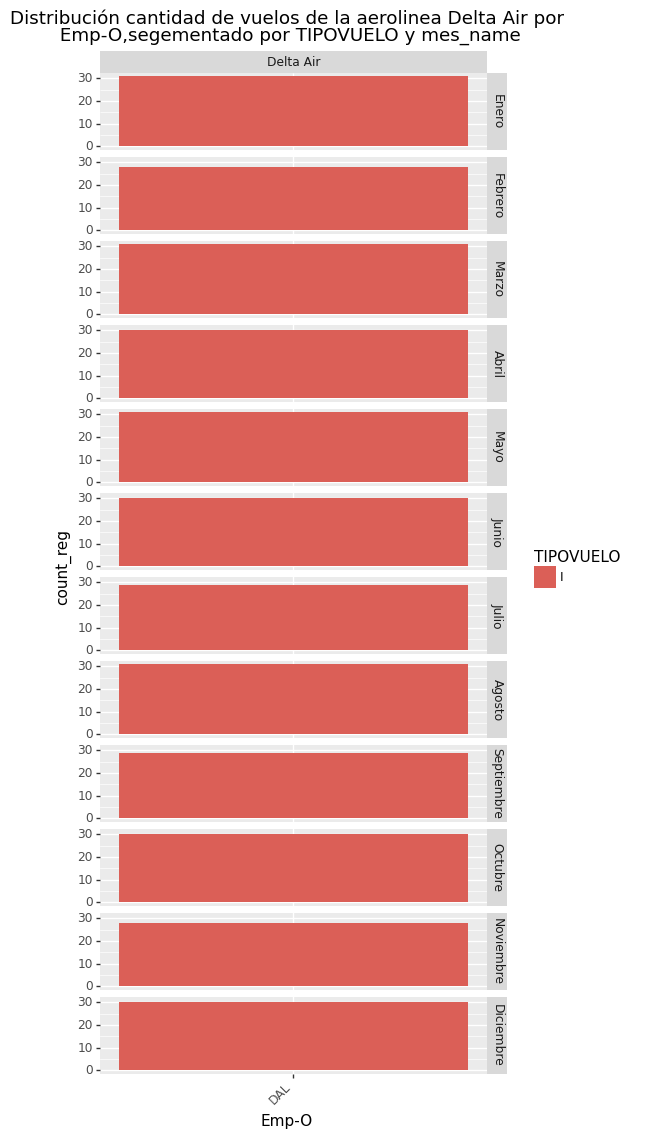

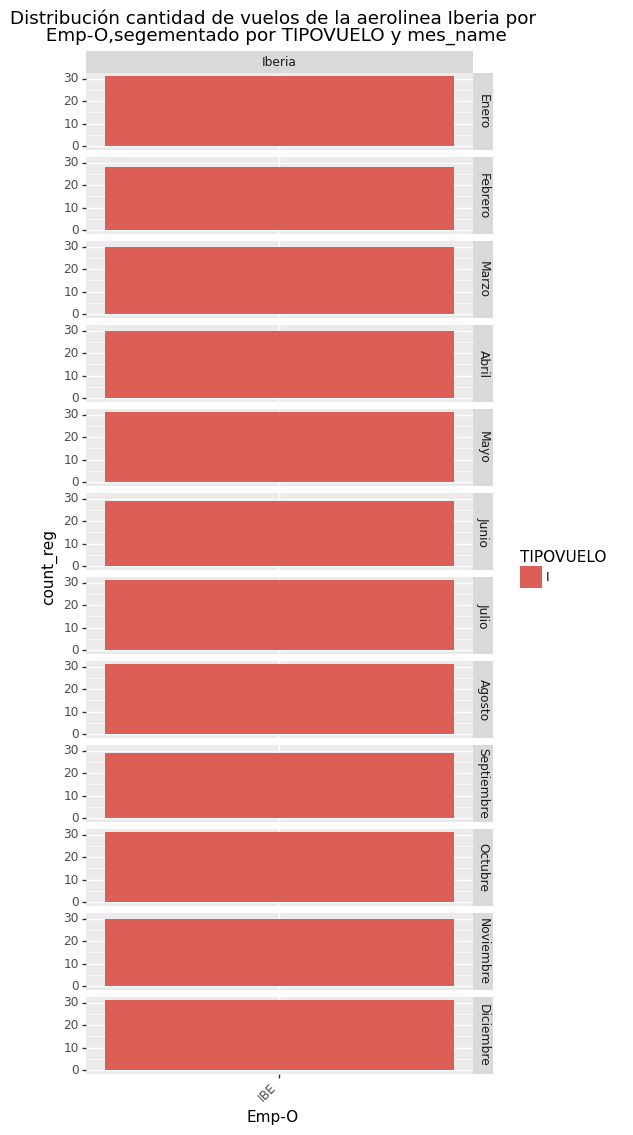

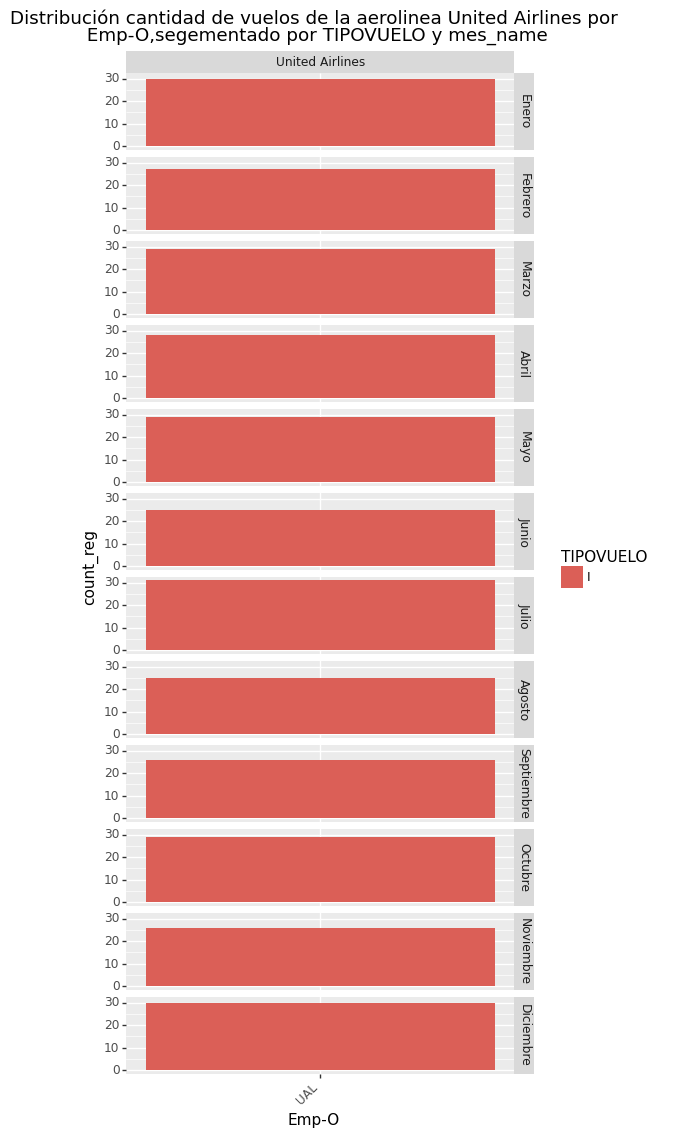

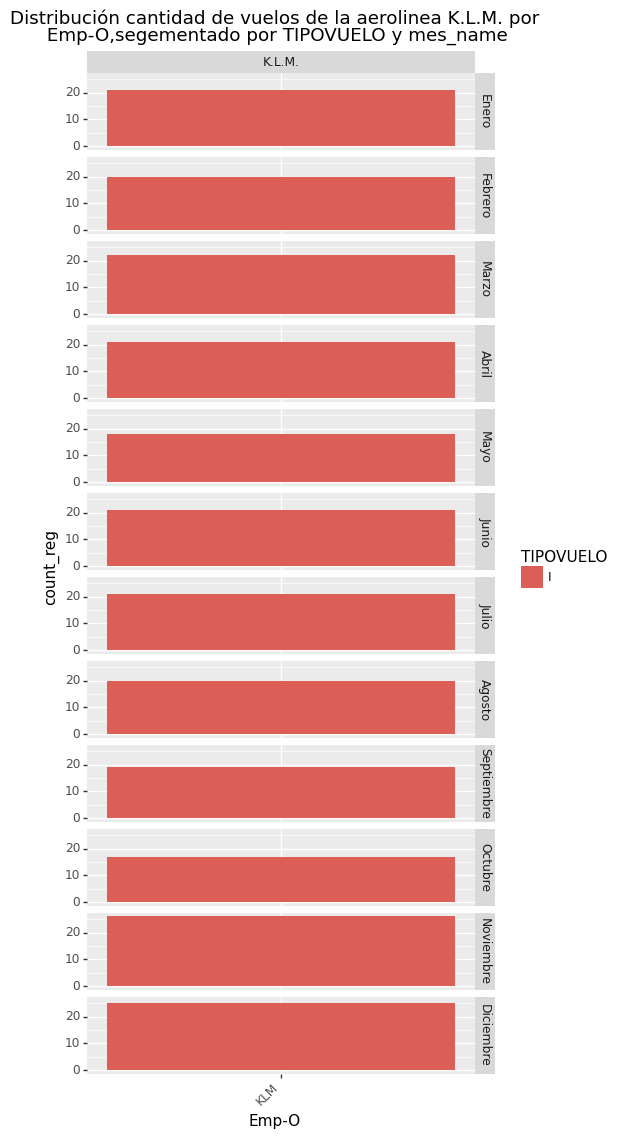

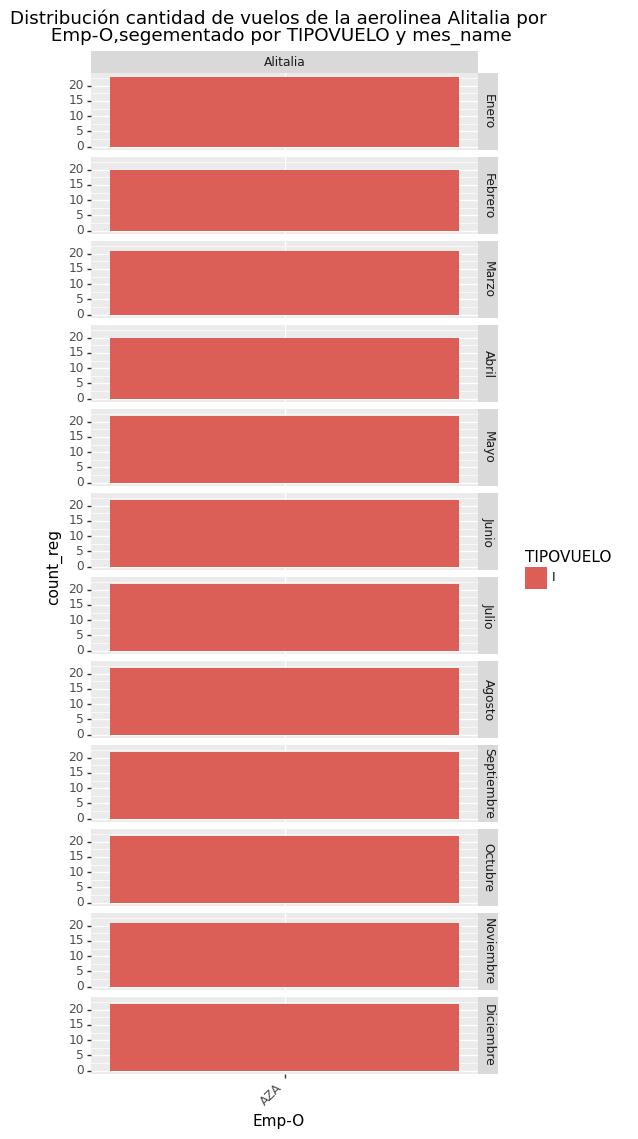

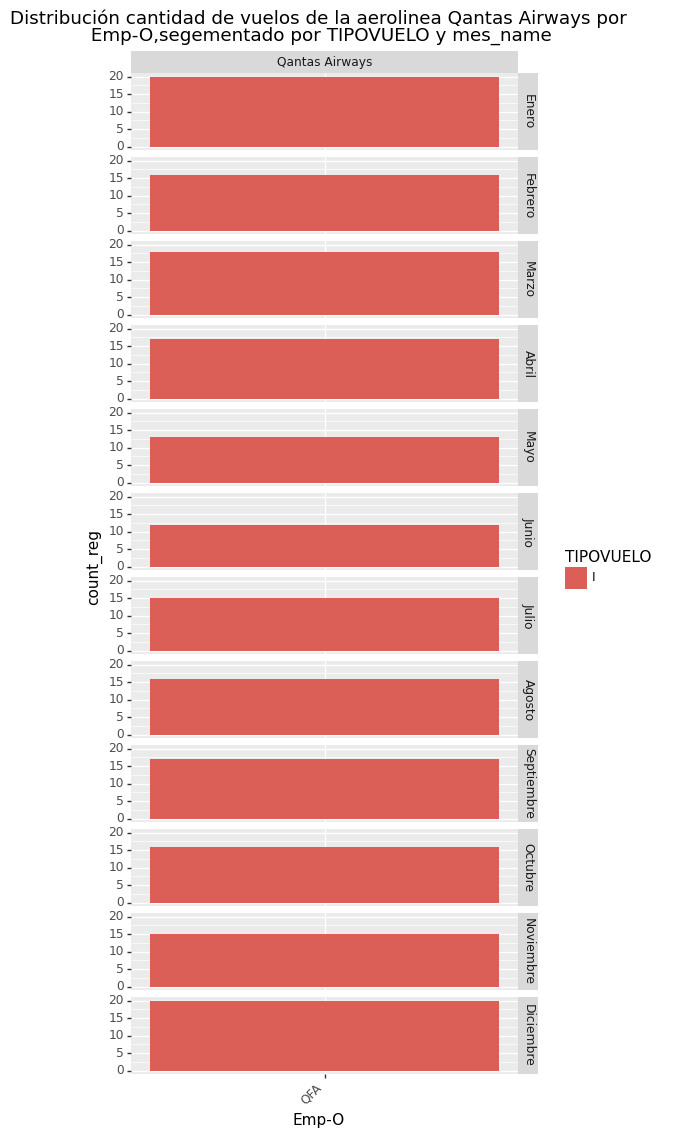

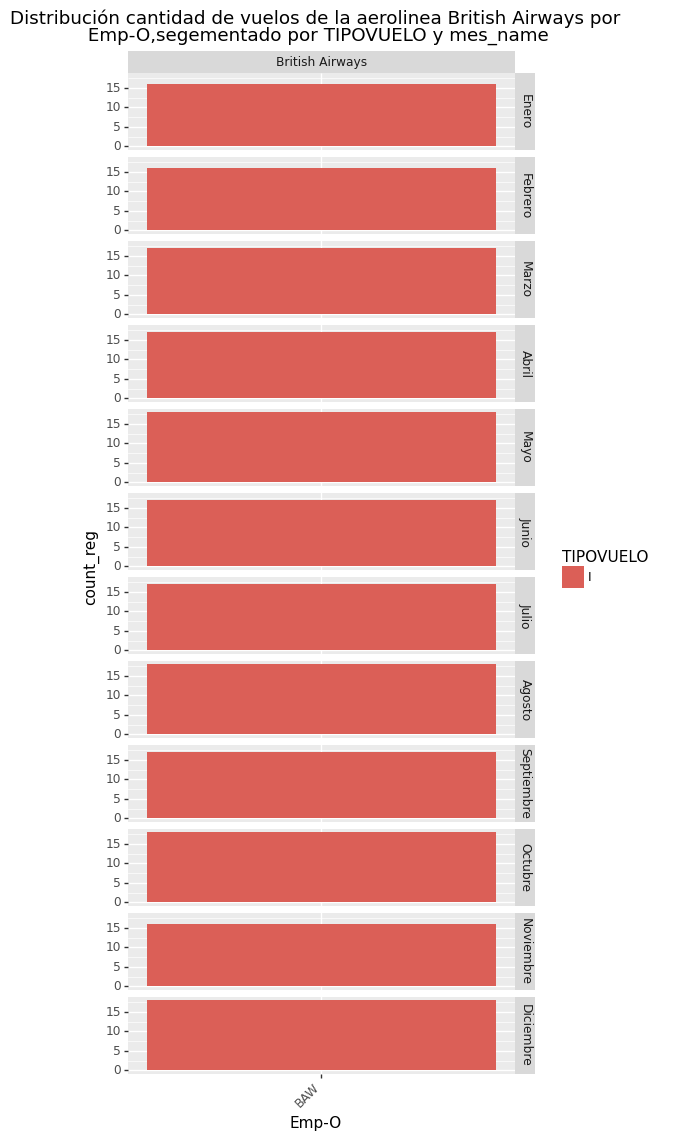

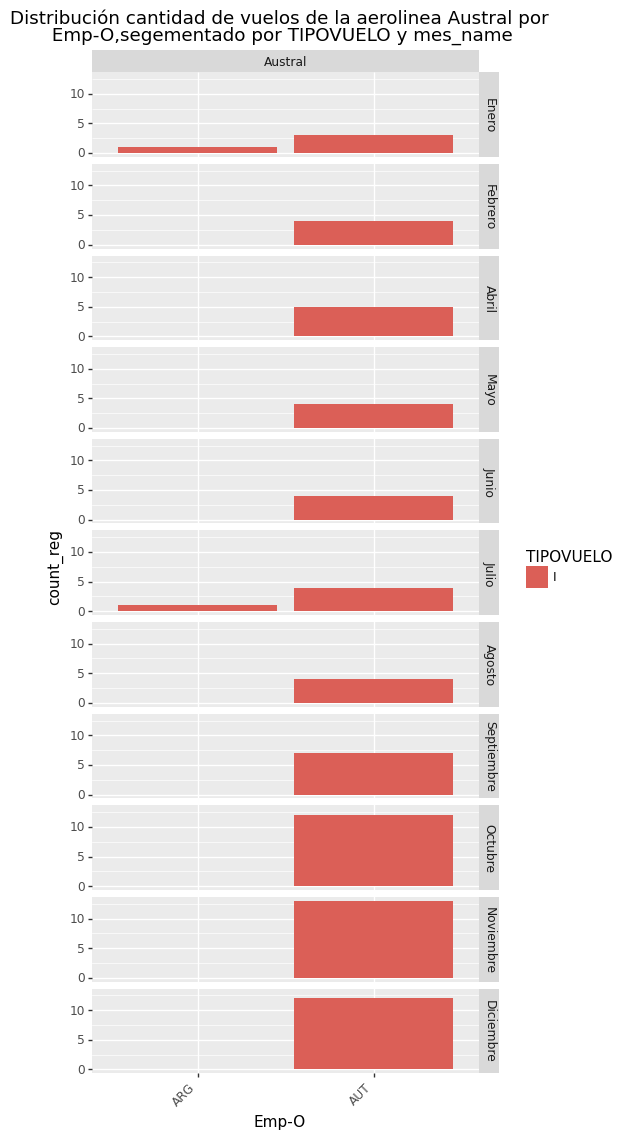

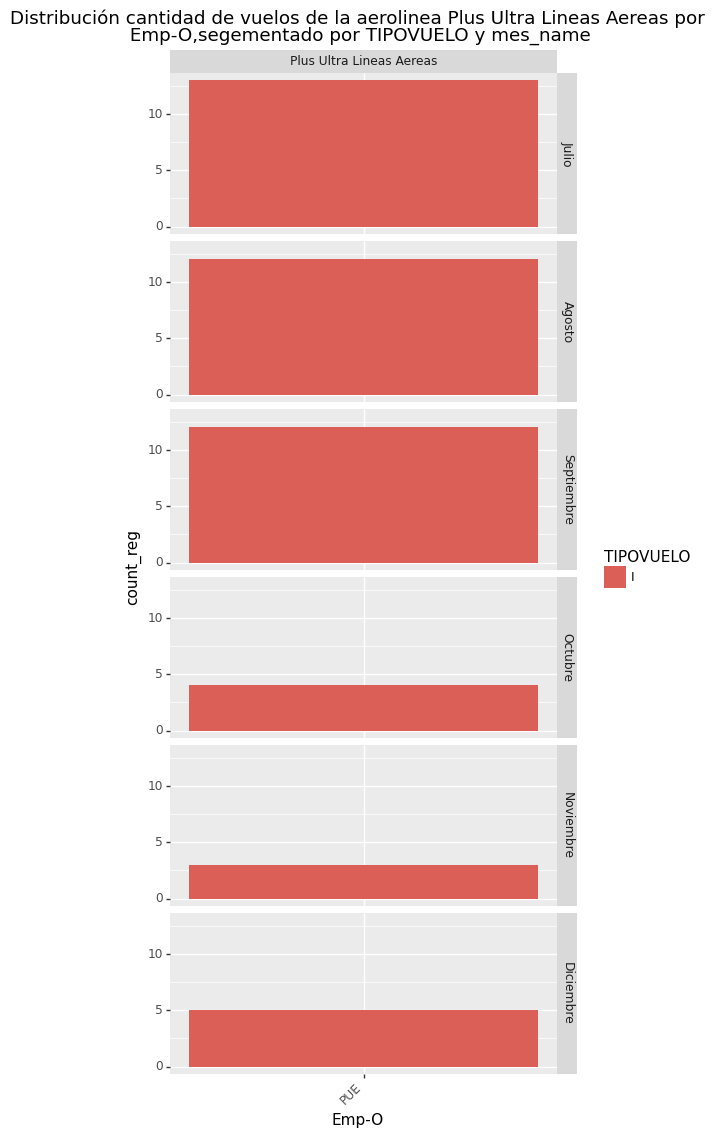

[<ggplot: (782806)>,
 <ggplot: (660505)>,
 <ggplot: (16810424)>,
 <ggplot: (16362298)>,
 <ggplot: (869623)>,
 <ggplot: (15802784)>,
 <ggplot: (780560)>,
 <ggplot: (754411)>,
 <ggplot: (16851697)>,
 <ggplot: (772349)>,
 <ggplot: (16395545)>,
 <ggplot: (16851475)>,
 <ggplot: (901623)>,
 <ggplot: (16357130)>,
 <ggplot: (16400659)>,
 <ggplot: (656180)>,
 <ggplot: (16796423)>,
 <ggplot: (773584)>,
 <ggplot: (16357277)>,
 <ggplot: (761510)>,
 <ggplot: (16845990)>,
 <ggplot: (16804337)>,
 <ggplot: (16883725)>]

In [19]:
# Cantidad de vuelos por aerolinea en 
id_lavel ="id_vuelo"
g_x_label="Emp-O"
g_y_label="count_reg"
g_fill_label="TIPOVUELO"

left_grid ="OPERA"
rigth_grid = "mes_name" #"." #"TIPOVUELO" 
facet_str =str( f" {rigth_grid} ~ {left_grid}")
df_g_plot =exp_lib.group_by_col(df_total,[g_x_label,g_fill_label,left_grid,rigth_grid],id_lavel).reset_index()
df_g_plot.mes_name = pd.Categorical(df_g_plot['mes_name'], categories=exp_lib.array_mes_name)
graf_out =[]
for i in (df_g_plot[left_grid].unique()):
    g_title = (f"Distribución cantidad de vuelos de la aerolinea {i} por"
           f"\n {g_x_label},segementado por {g_fill_label} y {rigth_grid}")
    graf_out.append(ggplot(
        df_g_plot[df_g_plot[left_grid] == i],
                           aes(x=g_x_label,
                                y= g_y_label,
                                fill=g_fill_label
                                ))
                                + geom_col()
                            #  +geom_histogram()
                                +facet_grid(facet_str)
                                +ggtitle(g_title)
                                +theme(axis_text_x = 
                                       element_text(angle=45, hjust=1),
                                       figure_size=(5,13))
                                # + scale_x_discrete(limits= exp_lib.array_mes_name)
                )
graf_out

### Conclusiones

En primer lugar, se identificó las las aerolineas con más registros como `Grupo LATAM`, luego los códgigos más frecuentes de estas aerolineas, ya que cada aerolinea posee más de un código, que refleja la suborganización del conglomerado. 
En base a esto se identificó que el `Sky Airline`  y `Grupo LATAM` son las dos organizaciones que poseen más vuelos en la base de datos. 

En segundo lugar, se vio la relacion del `Emp-O`  y el tipo de destino, como internalcion o nacional, siendo lan un código que solo representa vuelos nacionales, las otras organizaciones tienen vuelos dedicados a internaiconales. Salvo compañias como `Sky Airline`, `Latin American Wings` y `JetSmart SPA`. Las ultimas dos compañias, fueron 
creciendo en mercado a lo largo del 2017. Inclusive la última de ellas se tienen registros a partir de a medidados de año, [lo que coincide con la informacion publica.](https://www.delphosmagazine.com/jetsmart-cumple-4-anos-desde-su-primer-vuelo-regular-comercial/#:~:text=El%20primer%20vuelo%20regular%20comercial,%2C%20en%20el%20CC%2DAWA.)


## Ubicaciones posibles

### Ciudad de Origen

Identificar valides de los códigos de destinos y cuales son realmente significativos, para representar la ubicacion. Se aprecia que todos los vuelos provienen de Santiago, la columna principal a utilizar es `SIGLAORI`


In [20]:
#==========================================
# Todos los registros probienen de Santiago
#==========================================
list_group=[
            "SIGLAORI", 
            "Ori-O",
            "Ori-I",
            "TIPOVUELO",
            ]

exp_lib.df_groupby_subtotal(df_total,list_group)

,SIGLAORI,Ori-O,Ori-I,TIPOVUELO,subtotal,total,porcentaje en %
0,Santiago,SCEL,SCEL,I,31240,68206,45.8
1,Santiago,SCEL,SCEL,N,36966,68206,54.2


### Ciudades de Destino
La columna `SIGLADES` es la que representa el resto de las colummnas, por lo cual esta es la que representa la ciudad de destino de forma más general.
Luego viene la columna `Des-O` que solo varia para la ciudad de `Buenos Aires` 
y por último la columna `Des-I` puede variar para una ciudad. Entoncces la ciudad que se destinó el vulo no siempre termina ciendo el destino final.

In [21]:
# Destintos más concurridos
# ==========================================
# Permite identificar qué columna 
# representa mejor el destino del vuelo
list_group=[
        "SIGLADES",
        "Des-I",
        "Des-O",
        ]
print("Distribución cantidad de vuelos por ciudad de destino")
df_relacion_cod_label = exp_lib.df_groupby_subtotal(df_total,list_group)

# Describe la distribución
# df_relacion_cod_label.describe(include="all")
df_relacion_cod_label.head(20)

Distribución cantidad de vuelos por ciudad de destino


,SIGLADES,Des-I,Des-O,subtotal,total,porcentaje en %
0,Antofagasta,SCFA,SCFA,5786,5786,100.00
34,Lima,SPJC,SPJC,5270,5270,100.00
13,Calama,SCCF,SCCF,5145,5145,100.00
53,Puerto Montt,SCTE,SCTE,4351,4351,100.00
22,Concepcion,SCIE,SCIE,3993,3993,100.00
30,Iquique,SCDA,SCDA,3747,3747,100.00
68,Sao Paulo,SBGR,SBGR,3569,3569,100.00
10,Buenos Aires,SAEZ,SABE,3,3240,0.09
11,Buenos Aires,SAEZ,SAEZ,3237,3240,99.91
8,Buenos Aires,SABE,SABE,3090,3094,99.87


In [22]:
# Destintos más concurridos
# ==========================================
# Permite identificar qué columna 
# representa mejor el destino del vuelo
list_group=["SIGLADES"]
print("Distribución cantidad de vuelos por ciudad de destino")
df_relacion_cod_label = exp_lib.group_by_col(df_total,list_group,"id_vuelo").reset_index().head(20)

# Describe la distribución
# df_relacion_cod_label.describe(include="all")
print("Top 20 de los principales destinos")
list_top_citys =df_relacion_cod_label["SIGLADES"].unique().tolist()
df_relacion_cod_label

Distribución cantidad de vuelos por ciudad de destino
Top 20 de los principales destinos


,SIGLADES,count_reg
0,Buenos Aires,6335
1,Antofagasta,5786
2,Lima,5270
3,Calama,5146
4,Puerto Montt,4357
5,Concepcion,3993
6,Iquique,3747
7,Sao Paulo,3569
8,Temuco,2589
9,Arica,2436


### Ciudades destino por mes

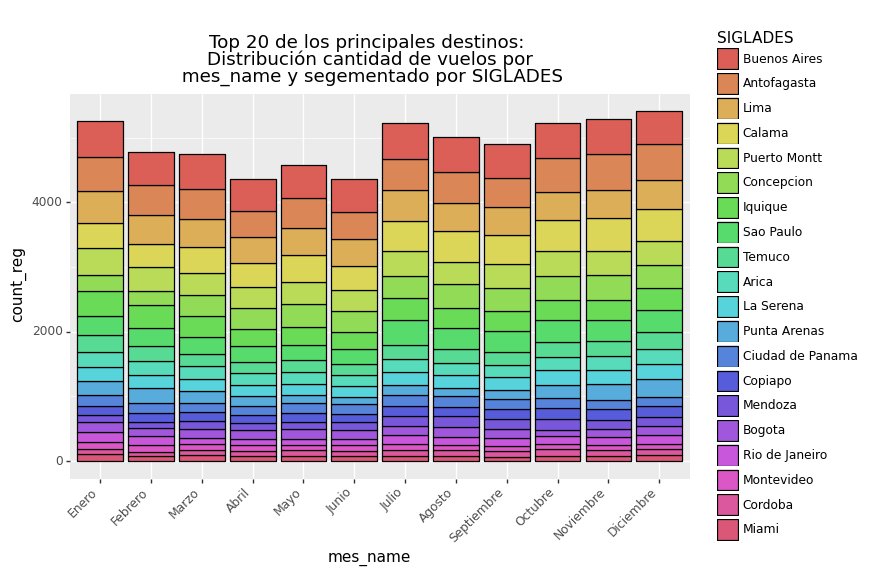

<ggplot: (22068845)>

In [23]:
# Top 20 de los principales destinos
id_lavel ="id_vuelo"
g_x_label="mes_name"
g_y_label="count_reg"
g_fill_label="SIGLADES"
df_g = exp_lib.group_by_col(
                df_total[ df_total["SIGLADES"].isin(list_top_citys)]
                ,["mes_name","SIGLADES"],"id_vuelo").reset_index()
df_g.mes_name = pd.Categorical(df_g['mes_name'], categories=exp_lib.array_mes_name)
df_g["SIGLADES"] = pd.Categorical(df_g['SIGLADES'], categories=list_top_citys)

g_title = ("Top 20 de los principales destinos: \n"
            f"Distribución cantidad de vuelos por"
           f"\n {g_x_label} y segementado por {g_fill_label}")
graf_out =(ggplot(df_g, aes(x=g_x_label,
                                y= g_y_label,
                                fill=g_fill_label
                                ))
                                + geom_col(color = "black")
                                +ggtitle(g_title)
                                +theme(axis_text_x = 
                                       element_text(angle=45, hjust=1),
                                       figure_size=(8,5)) )
graf_out

In [24]:
# Construccion del dataframe para identificar el top 10 de los destinos para cada mes
list_group=["SIGLADES","mes_name"]
df_g_total = exp_lib.group_by_col(df_total,list_group,"id_vuelo").reset_index()
list_group_index = exp_lib.array_mes_name       # Orden de los meses
# Listado de dataframes, que registran por mis mismos el top 10
list_df = [
        df_g_total[ df_g_total.mes_name == i ]      # Filtro para cada mes
            .nlargest(10,columns='count_reg')       # Metodo utilizado para el ranking
            for i in list_group_index       # Iteracion mensual
            ]
df_g_full = pd.concat(list_df)
df_g_full.head(6)
df_g_full.mes_name = pd.Categorical(df_g_full['mes_name'], categories=exp_lib.array_mes_name)

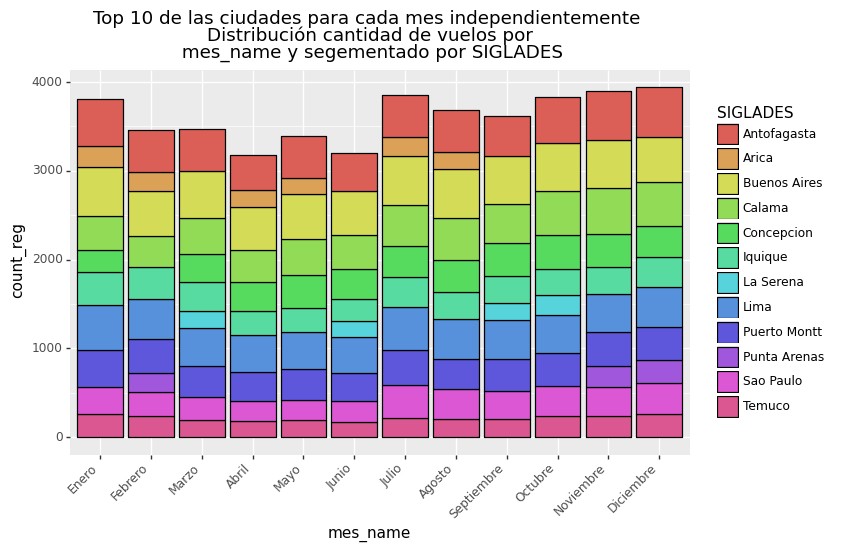

<ggplot: (19771880)>

In [25]:
# Top 10 de las ciudades para cada mes independientemente
id_lavel ="id_vuelo"
g_x_label="mes_name"
g_y_label="count_reg"
g_fill_label="SIGLADES"
g_title = ("Top 10 de las ciudades para cada mes independientemente \n"
            f"Distribución cantidad de vuelos por"
           f"\n {g_x_label} y segementado por {g_fill_label}")
graf_out =(ggplot(df_g_full, aes(x=g_x_label,
                                y= g_y_label,
                                fill=g_fill_label
                                ))
                                + geom_col(color = "black")
                                # + geom_col(position=position_dodge(width=0.9))
                            #  +geom_histogram()
                                +ggtitle(g_title)
                                +theme(axis_text_x = 
                                       element_text(angle=45, hjust=1),
                                       figure_size=(8,5))
                                # + scale_x_discrete(limits= exp_lib.array_mes_name)
                )
graf_out

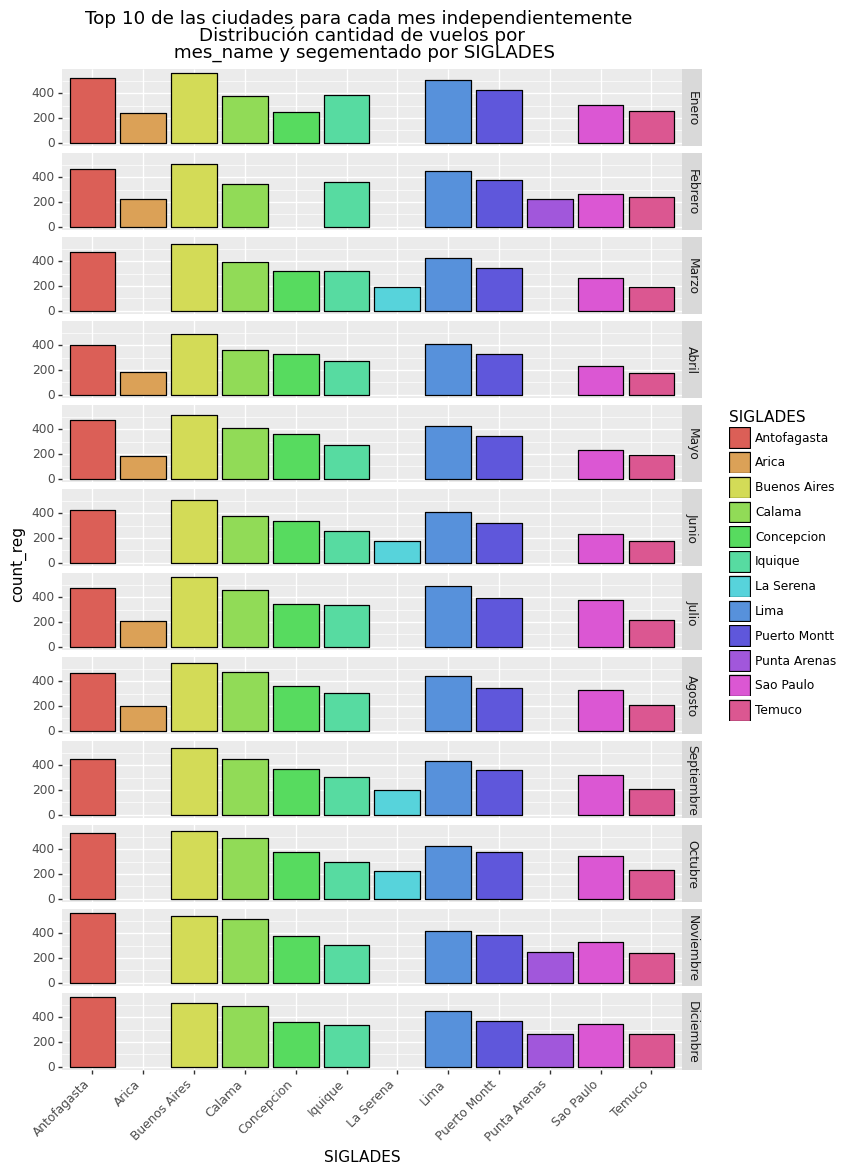

<ggplot: (776159)>

In [26]:
# Visualizacion anterior pero particionada
id_lavel ="id_vuelo"
g_x_label="mes_name"
g_y_label="count_reg"
g_fill_label="SIGLADES"
g_title = ("Top 10 de las ciudades para cada mes independientemente \n"
            f"Distribución cantidad de vuelos por"
           f"\n {g_x_label} y segementado por {g_fill_label}")
graf_out =(ggplot(df_g_full, aes(x=g_fill_label,
                                y= g_y_label,
                                fill=g_fill_label
                                ))
                                + geom_col(color = "black")
                                # + geom_col(position=position_dodge(width=0.9))
                            #  +geom_histogram()
                                +ggtitle(g_title)
                                +theme(axis_text_x = 
                                       element_text(angle=45, hjust=1),
                                       figure_size=(8,13))
                                +facet_grid(f" mes_name ~ .")
                                # + scale_x_discrete(limits= exp_lib.array_mes_name)
                )
graf_out

### **Conclusiones**

Se aprecia que el top 10 de los destinos desde el aeropuerto de santiango varian respecto a los meses del año.
Los principales destinos de vuelos desde el aeropuerto son Antofagasta Buenos Aires y Lima. Por otro lado se aprecian destinos bastante ocacionales que suben y bajan en el top 10 mensual, como Punta Arenas lo cual se puede deber al turismo de la zona.

Además se revizó la cantidad de vuelos al top 20 de los destinos más recurrentes en el año 2017 y cada uno de ellos sobreapasan los mil vuelos salientes de Santiago de Chile. Estos 20 destinos representan a 59142 registros de los 68206, lo que significa el 86.7% de los vuelos de la base de datos. Considerando estó podria representar una buena metrica de filtrado de los datos para el estudio.

#  2 Generate the following additional columns. Please export them to a CSV file named synthetic_features.csv:

>Este proceso se llevó previamente acabo utilizando la función construida 
>> `exp_lib.additional_columns(df_total)`
>La función realiza todas las creacioens de las columnas utilizando la data provista (dataset_SCL.csv), luego en el proceso inicial de este código en el try / exept si el archivo synthetic_features.csv no está creado lo crea y guarda en la carpeta `.../data/`

#   3 What is the behavior of the delay rate across destination, airline, month of the year, day of the week, season, type of flight? What variables would you expect to have the most influence in predicting delays?

### Ajuste de las columnas y creacion de nuevas columnas

Se incorporaron nuevas columnas al modelo, ademas de las solicitadas.

In [27]:
df_total["holidays_season"] = ( 
    df_total["date_i"].apply(exp_lib.col_holidays_season))
df_total.groupby(["delay_15","holidays_season"]).count()["id_vuelo"]

delay_15  holidays_season
0.0       invierno            2300
          laboral            37300
          septiembre          3142
          verano             12850
1.0       invierno             990
          laboral             8144
          septiembre           615
          verano              2865
Name: id_vuelo, dtype: int64

In [28]:
df_total["cambio_destino"] = (
    df_total["Des-I"] # Código de Destino Original
        != df_total["Des-O"]) # código de Destino final
df_total.groupby(
    ["delay_15","cambio_destino"]).count()["id_vuelo"]

delay_15  cambio_destino
0.0       False             55572
          True                 20
1.0       False             12606
          True                  8
Name: id_vuelo, dtype: int64

In [29]:
df_total["cambio_aerolinea"] = (df_total["Emp-I"] !=   # Código de Aerolinea Original
                                    df_total["Emp-O"])  # código de Aerolinea final
# df_total["cambio_aerolinea"].head(2)
df_total.groupby(["delay_15","cambio_aerolinea"]).count()["id_vuelo"]


delay_15  cambio_aerolinea
0.0       False               40284
          True                15308
1.0       False                9253
          True                 3361
Name: id_vuelo, dtype: int64

In [30]:
df_total["cambio_numvuelo"] = (df_total["Vlo-I"] !=   # Código de vuelo Original
                                    df_total["Vlo-O"])  # código de vuelo final
df_total.groupby(["delay_15","cambio_numvuelo"]).count()["id_vuelo"]


delay_15  cambio_numvuelo
0.0       False              52228
          True                3364
1.0       False              11459
          True                1155
Name: id_vuelo, dtype: int64

#### Renombre y preseleccion de columnas

In [31]:
df_fit = df_total[
    ["id_vuelo",
    'TIPOVUELO',
    'OPERA', 
    # 'SIGLAORI', # Ciudad de origen
    'SIGLADES', 
    'date_i',"DIA","DIANOM", "MES", "mes_name", # Fecha
    "holidays_season", 'high_season', # Vacaciones
    'period_day', 
    'date_o', 'min_diff', 'delay_15', # Columns to predict
    # Cambios 
    "cambio_destino", # Ha cambiado el código de destino
    "cambio_aerolinea", # Ha cambiado el código de la aerolinea
    "cambio_numvuelo",
    # Número del vuelo
    "Vlo-O",
    "Vlo-I",
    ]]
df_fit = df_fit.rename( columns= {
    'TIPOVUELO' : "tipo_vuelo", 
    'OPERA' : "opera" , 
    'SIGLADES' : "to_city" , 
    "DIA" : "dia",
    "MES":"mes",
    'DIANOM' : 'dianom',
    'high_season' : "high_season", 
    'period_day' : "period_day" , 
    'min_diff' : "min_diff" , 
    'delay_15' : "delay_15",
}
)
print(df_fit.dtypes)
df_fit.head(4)

id_vuelo                    object
tipo_vuelo                  object
opera                       object
to_city                     object
date_i              datetime64[ns]
dia                        float16
dianom                      object
mes                        float16
mes_name                    object
holidays_season             object
high_season                 object
period_day                  object
date_o              datetime64[ns]
min_diff                   float16
delay_15                   float16
cambio_destino                bool
cambio_aerolinea              bool
cambio_numvuelo               bool
Vlo-O                       object
Vlo-I                       object
dtype: object


,id_vuelo,tipo_vuelo,opera,to_city,date_i,dia,dianom,mes,mes_name,holidays_season,high_season,period_day,date_o,min_diff,delay_15,cambio_destino,cambio_aerolinea,cambio_numvuelo,Vlo-O,Vlo-I
0,0,I,American Airlines,Miami,2017-01-01 23:30:00,1.0,Domingo,1.0,Enero,verano,1,night,2017-01-01 23:33:00,3.0,0.0,False,False,False,226,226
1,1,I,American Airlines,Miami,2017-01-02 23:30:00,2.0,Lunes,1.0,Enero,verano,1,night,2017-01-02 23:39:00,9.0,0.0,False,False,False,226,226
2,2,I,American Airlines,Miami,2017-01-03 23:30:00,3.0,Martes,1.0,Enero,verano,1,night,2017-01-03 23:39:00,9.0,0.0,False,False,False,226,226
3,3,I,American Airlines,Miami,2017-01-04 23:30:00,4.0,Miercoles,1.0,Enero,verano,1,night,2017-01-04 23:33:00,3.0,0.0,False,False,False,226,226


In [32]:
del df_total

### Distribución General columnas creadas

<function matplotlib.pyplot.show(close=None, block=None)>

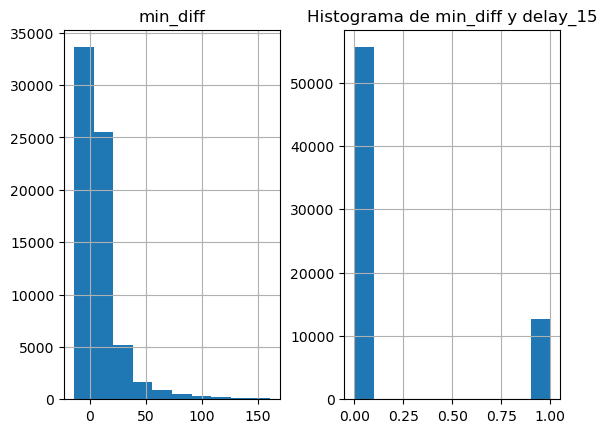

In [33]:
# variables construidas
df_fit[['min_diff',"delay_15","high_season","holidays_season","period_day"]].hist() 
plt.title("Histograma de min_diff y delay_15")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

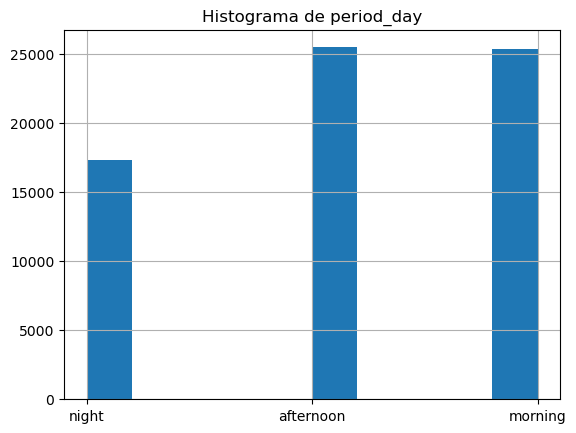

In [34]:
# variables construidas
df_fit["period_day"].hist() 
plt.title("Histograma de period_day")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

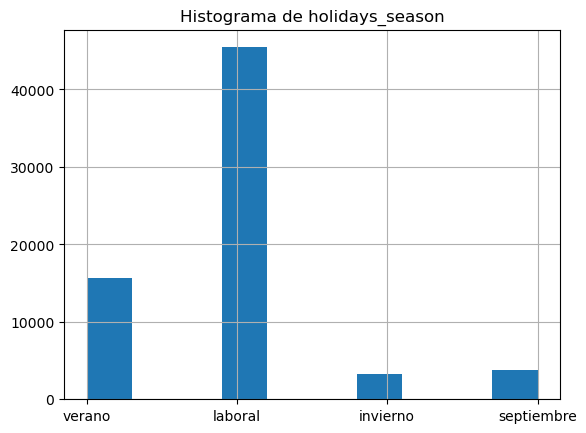

In [35]:
# variables construidas
df_fit["holidays_season"].hist() 
plt.title("Histograma de holidays_season")
plt.show

In [36]:
df_fit[['min_diff',"delay_15","high_season"]].describe()

,min_diff,delay_15
count,68206.0,68206.000000
mean,NaN,0.184937
std,0.0,0.388428
min,-14.0,0.000000
25%,-1.0,0.000000
50%,4.0,0.000000
75%,12.0,0.000000
max,161.0,1.000000


## Relacion entre el Delay y las columnas del dataframe

### Analisis estadisitico Chi cuadrado

In [37]:
# Columnas a analizar
col_x = df_fit.columns.to_list()
col_x.pop(col_x.index("delay_15"))
col_x.pop(col_x.index("id_vuelo"))
col_x.pop(col_x.index("min_diff"))
col_x.pop(col_x.index("date_o"))
y_col = "delay_15"
exp_lib.dataframe_chi_sqr(df_fit,col_x,y_col
        ).reset_index().drop(columns=["index"])

['opera' 'to_city' 'Vlo-O' 'Vlo-I' 'mes' 'mes_name' 'tipo_vuelo'
 'holidays_season' 'dianom' 'period_day' 'cambio_numvuelo' 'dia'
 'high_season' 'date_i' 'cambio_aerolinea' 'cambio_destino']


,columna,Chi-cuadrad,p-valor,Grados_de_libertad
0,opera,1808.677678,0.000000e+00,22
1,to_city,1895.049679,0.000000e+00,61
2,Vlo-O,6342.837863,0.000000e+00,860
3,Vlo-I,5566.964511,0.000000e+00,583
4,mes,1184.670561,3.258817e-247,11
5,mes_name,1184.670561,3.258817e-247,11
6,tipo_vuelo,631.952726,1.879847e-139,1
7,holidays_season,315.420549,4.571444e-68,3
8,dianom,220.209158,9.389834e-45,6
9,period_day,165.639993,1.075802e-36,2



En primer lugar, como se aprecio previamente, los vuelos principalente se concentran en 20 destinos, al tomar en cuenta que el destino es significativo para el estudio, se recalcularán las metricas con los datos de los 20 destinos más frecuentes.

In [39]:
# Top 20 de los principales destinos
# Distribución cantidad de vuelos por ciudad de destino
df_citys = exp_lib.group_by_col(df_fit,["to_city"],"id_vuelo").reset_index().head(20)
list_top_citys =df_citys["to_city"].unique().tolist()
df_citys


,to_city,count_reg
0,Buenos Aires,6335
1,Antofagasta,5786
2,Lima,5270
3,Calama,5146
4,Puerto Montt,4357
5,Concepcion,3993
6,Iquique,3747
7,Sao Paulo,3569
8,Temuco,2589
9,Arica,2436


In [40]:
df_fit_filt = df_fit[ df_fit["to_city"].isin(list_top_citys)]
col_x = df_fit.columns.to_list()
col_x.pop(col_x.index("delay_15"))
col_x.pop(col_x.index("id_vuelo"))
col_x.pop(col_x.index("min_diff"))
col_x.pop(col_x.index("date_o"))
y_col = "delay_15"
exp_lib.dataframe_chi_sqr(df_fit_filt,col_x,y_col
).reset_index().drop(columns=["index"])

['Vlo-O' 'Vlo-I' 'opera' 'to_city' 'mes' 'mes_name' 'tipo_vuelo'
 'holidays_season' 'dianom' 'period_day' 'dia' 'cambio_numvuelo' 'date_i'
 'high_season' 'cambio_aerolinea' 'cambio_destino']


,columna,Chi-cuadrad,p-valor,Grados_de_libertad
0,Vlo-O,5441.499723,0.000000e+00,744
1,Vlo-I,4760.865358,0.000000e+00,507
2,opera,1390.574531,1.737756e-288,14
3,to_city,1209.988778,6.740365e-245,19
4,mes,1068.008411,4.402332e-222,11
5,mes_name,1068.008411,4.402332e-222,11
6,tipo_vuelo,676.402437,4.048319e-149,1
7,holidays_season,325.126807,3.621654e-70,3
8,dianom,214.324530,1.687246e-43,6
9,period_day,181.904520,3.161808e-40,2


#### Resultado:

Se aprecia según las metricas de Chi cuadrado, que en general las columnas estudiadas tienen un poder de significacia sobre la variable `delay_15`. Hay que tomar en cuenta que muchas de estas columnas representan los mismo por lo cual se debe seleccionar para un atributo en particular una sola de ellas. A priori todas los atributos posee isgnificancia salvo la columna `cambio_destino`, que representa si hubo o uno un cambio en el código de destino `Des`. Otra columna que refleja este cambio tambien que pudiese o no representar el estado futuro del vuelo y no concerse de antemano es `cambio_aerolinea` y `cambio_numvuelo`, Siendo este último el que posee mayores indicadores. Pero como el Chi-cuadrado y el p-valor no son sobresalientes como en el resto de los atributos, no se seguirán estudiando

La manera de identificar sí una variable es significativa, es por medio de la columna `p-valor` que cuando esta metrica posee un valor cercano o igual a 0 significa que logra representan a la variable `delay_15`, en el caso que sea superior al nivel de significacia definido, esta variable no debe ser considerada para el modelo predictivo.

Por otro lado, la siguiente métrica a considerar es el valor de Chi-cuadrad, este valor no posee una escala definida, pero entre más alto es el valor mayor es la relacion entre las variables. 

Por último, se tiene el valor de `Grados_de_libertad` el cual es meramente indicativo, este toma en cuenta la amplitud de la variable cátegorica.

## Distribuciones

### Operador
Considerando que muchos de los operadores son internacionales se revisará la cantidad de registros para cada uno de ellos

#### Filtrado de los datos
Dado que la cantidad de aerolineas no es menor y considerando que no todas ellas posee gran cantidad de vuelos, se decidió descartarlas. Despues de ello revisar los destinos y descartar lo destinos menos frecuentes de igual forma. 
La desición se desarrollo en la etapa de desarrollo. En primer lugar, se seleccionó a los 20 destinos más frecuentes, cada uno de ellos con más de mil registros cada uno, luego se descartaron a las aerolineas que poseen menos de mil registros, para los 20 vuelos, se utilizó para la data de estudio solo los 7 operadores con más vuelos registrados, esto significa una reducción del 3,68 % de los datos de estudio. Por último, se identificó que 
los vuelos de algunas ciudades disminuyeron de los mil registros, se desidió quedarse con únicamente los 18 destinos con más de mil. 

Este proceso de filtrado se presenta a continuación

In [42]:
df_data = exp_lib.df_filter_count_for_category(
    exp_lib.df_filter_count_for_category(
        exp_lib.df_filter_count_for_category(
            df_fit,
            "to_city")
                ,"opera")
                    ,"to_city")


In [43]:
del df_fit_filt

In [44]:
# Resutlado Chi-Cuadrado
col_x = df_data.columns.to_list()
col_x.pop(col_x.index("delay_15"))
col_x.pop(col_x.index("id_vuelo"))
col_x.pop(col_x.index("min_diff"))
col_x.pop(col_x.index("date_o"))
y_col = "delay_15"
exp_lib.dataframe_chi_sqr(df_data,col_x,y_col).reset_index().drop(columns=["index"])

['Vlo-O' 'Vlo-I' 'mes' 'mes_name' 'to_city' 'opera' 'tipo_vuelo'
 'holidays_season' 'dianom' 'period_day' 'dia' 'cambio_numvuelo' 'date_i'
 'high_season' 'cambio_destino' 'cambio_aerolinea']


,columna,Chi-cuadrad,p-valor,Grados_de_libertad
0,Vlo-O,4383.190439,0.000000e+00,693
1,Vlo-I,3704.542641,0.000000e+00,465
2,mes,1119.282773,3.990905e-233,11
3,mes_name,1119.282773,3.990905e-233,11
4,to_city,1006.964032,2.915609e-203,17
5,opera,885.697753,4.641081e-188,6
6,tipo_vuelo,525.327610,2.934006e-116,1
7,holidays_season,300.868542,6.453435e-65,3
8,dianom,229.014222,1.242835e-46,6
9,period_day,162.400327,5.435218e-36,2


## Proporcion del delay_15 para cada atributo

<function matplotlib.pyplot.show(close=None, block=None)>

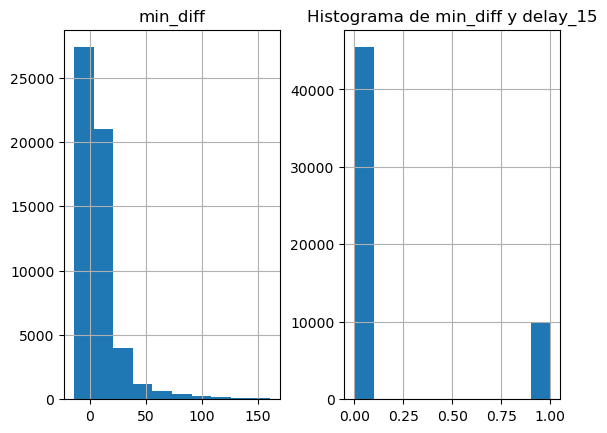

In [45]:
# variables construidas
df_data[['min_diff',"delay_15","high_season","holidays_season","period_day"]].hist() 
plt.title("Histograma de min_diff y delay_15")
plt.show

#### Proporcion del delay según la ciudad
Se aprecia que existen destinos con una proporción distinta a otros se aprecia cuales son las ciudades con mayor taza de atrazos y las que poseen menos porcentaje de estos, como lo es la Ciudad de Panamá

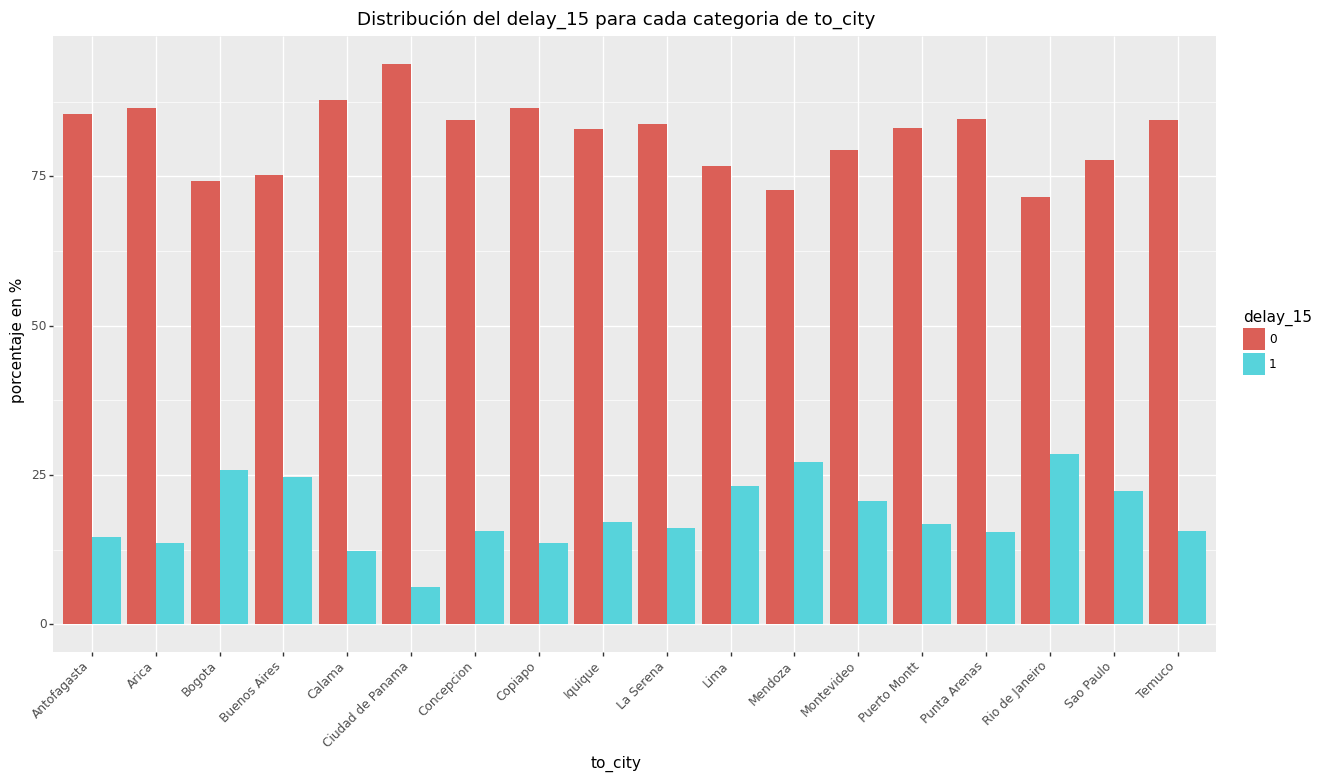

<ggplot: (22039727)>

In [47]:
# to_city
g_x_label="to_city"
# g_y_label="count_reg"
g_y_label="porcentaje en %"

g_fill_label="delay_15"
# g_title = (f"Distribución g_y_label} por"
#            f"\n {g_x_label} y segementado por {g_fill_label}")
g_title = (f"Distribución del {g_fill_label} para cada categoria de {g_x_label}"
)

df_g =exp_lib.df_groupby_subtotal(
                df_data,
                [g_x_label,g_fill_label],
              #   "id_vuelo"
                ).reset_index()

df_g[g_fill_label] = df_g[g_fill_label].astype("category")

graf_out =(ggplot(df_g, aes(x=g_x_label,
                                y=g_y_label,
                                fill=g_fill_label))
                                + geom_col(position=position_dodge(width=0.9))
                                +ggtitle(g_title)
                                +theme(axis_text_x = 
                                       element_text(angle=45, hjust=1),
                                       figure_size=(15,8))
                            #     + scale_x_discrete(limits= exp_lib.array_mes_name)
                )
graf_out

#### Proporcion del delay según la Aerolinea

Según el grafico siguiente, se destacan las diferencias entre las aerolineas que más retrazos tienen y las que no. Recordar que cada una de estas aerolineas posee más de mil vuelos registrados en los datos. Se  destaca la aerolinea Copa Air la más confiable con tan solo el 6.27% de sus vuelos con atrasos mayores a 15 minutos.

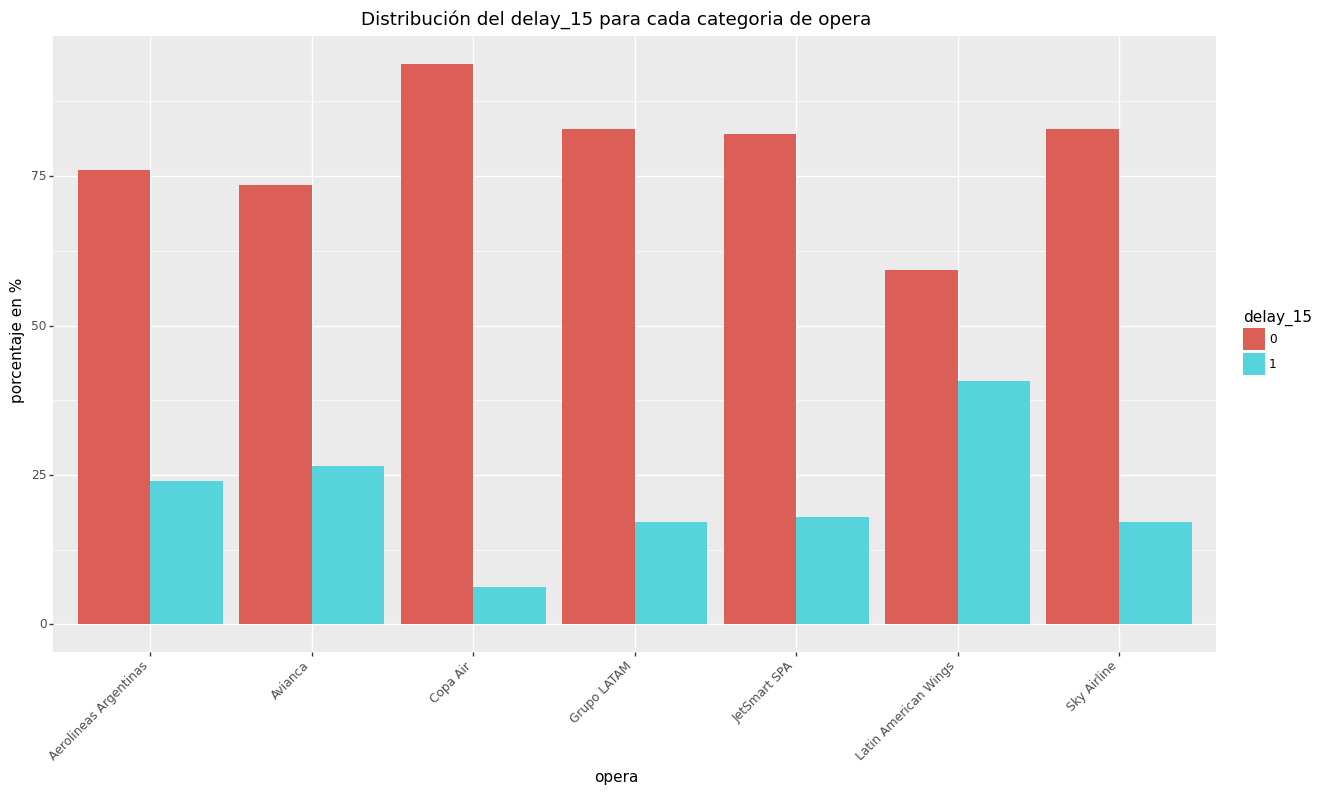

<ggplot: (22090445)>

In [48]:
# opera
g_x_label="opera"
# g_y_label="count_reg"
g_y_label="porcentaje en %"

g_fill_label="delay_15"
# g_title = (f"Distribución g_y_label} por"
#            f"\n {g_x_label} y segementado por {g_fill_label}")
g_title = (f"Distribución del {g_fill_label} para cada categoria de {g_x_label}"
)

df_g =exp_lib.df_groupby_subtotal(
                df_data,
                [g_x_label,g_fill_label],
              #   "id_vuelo"
                ).reset_index()

df_g[g_fill_label] = df_g[g_fill_label].astype("category")

graf_out =(ggplot(df_g, aes(x=g_x_label,
                                y=g_y_label,
                                fill=g_fill_label))
                                + geom_col(position=position_dodge(width=0.9))
                                +ggtitle(g_title)
                                +theme(axis_text_x = 
                                       element_text(angle=45, hjust=1),
                                       figure_size=(15,8))
                            #     + scale_x_discrete(limits= exp_lib.array_mes_name)
                )
graf_out

#### Proporcion del delay según la Mes
El grafico siguiente representa el calro aumento en la proporción de atrasos en el mes de Julio. Además de una leve disminución en el mez de marzo.
<!-- Según el grafico siguiente, se destacan las diferencias entre las aerolineas que más retrazos tienen y las que no. Recordar que cada una de estas aerolineas posee más de mil vuelos registrados en los datos. Se  destaca la aerolinea Copa Air la más confiable con tan solo el 6.27% de sus vuelos con atrasos mayores a 15 minutos. -->

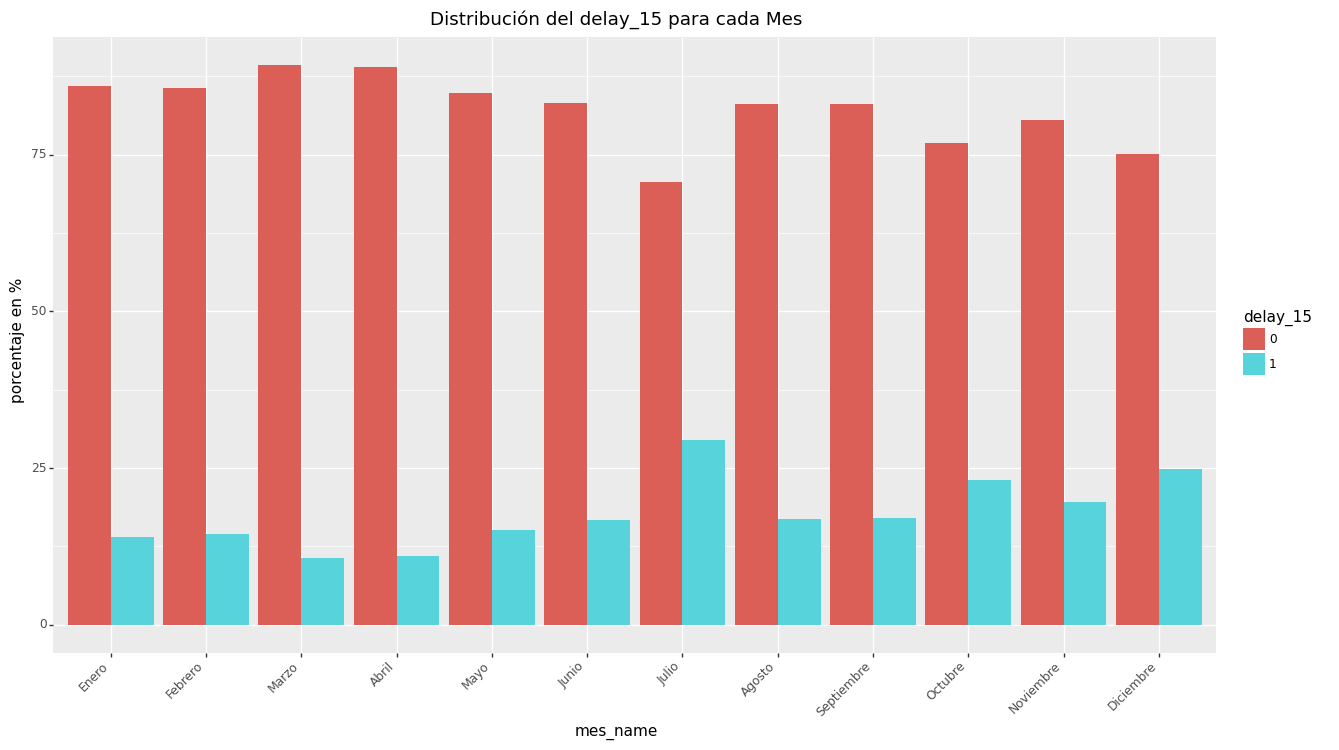

<ggplot: (815550)>

In [50]:
# mes_name
g_x_label="mes_name"
# g_y_label="count_reg"
g_y_label="porcentaje en %"

g_fill_label="delay_15"
# g_title = (f"Distribución g_y_label} por"
#            f"\n {g_x_label} y segementado por {g_fill_label}")
g_title = (f"Distribución del {g_fill_label} para cada Mes"
)

df_g = exp_lib.df_groupby_subtotal(
                df_data,
                [g_x_label,g_fill_label],
              #   "id_vuelo"
                ).reset_index()

df_g[g_fill_label] = df_g[g_fill_label].astype("category")

graf_out =(ggplot(df_g, aes(x=g_x_label,
                                y=g_y_label,
                                fill=g_fill_label))
                                + geom_col(position=position_dodge(width=0.9))
                                +ggtitle(g_title)
                                +theme(axis_text_x = 
                                       element_text(angle=45, hjust=1),
                                       figure_size=(15,8))
                                + scale_x_discrete(limits= exp_lib.array_mes_name)
                )
graf_out

#### Proporcion del delay según el tipo de destino o vuelo

A continuación se presenta la relacion entre la tasa de atrasos y el tipo de destino, en ello se destaca que los vuelos internacionales posee una tasa aún mayor a los nacionales en lo que respecta a los atrasos.

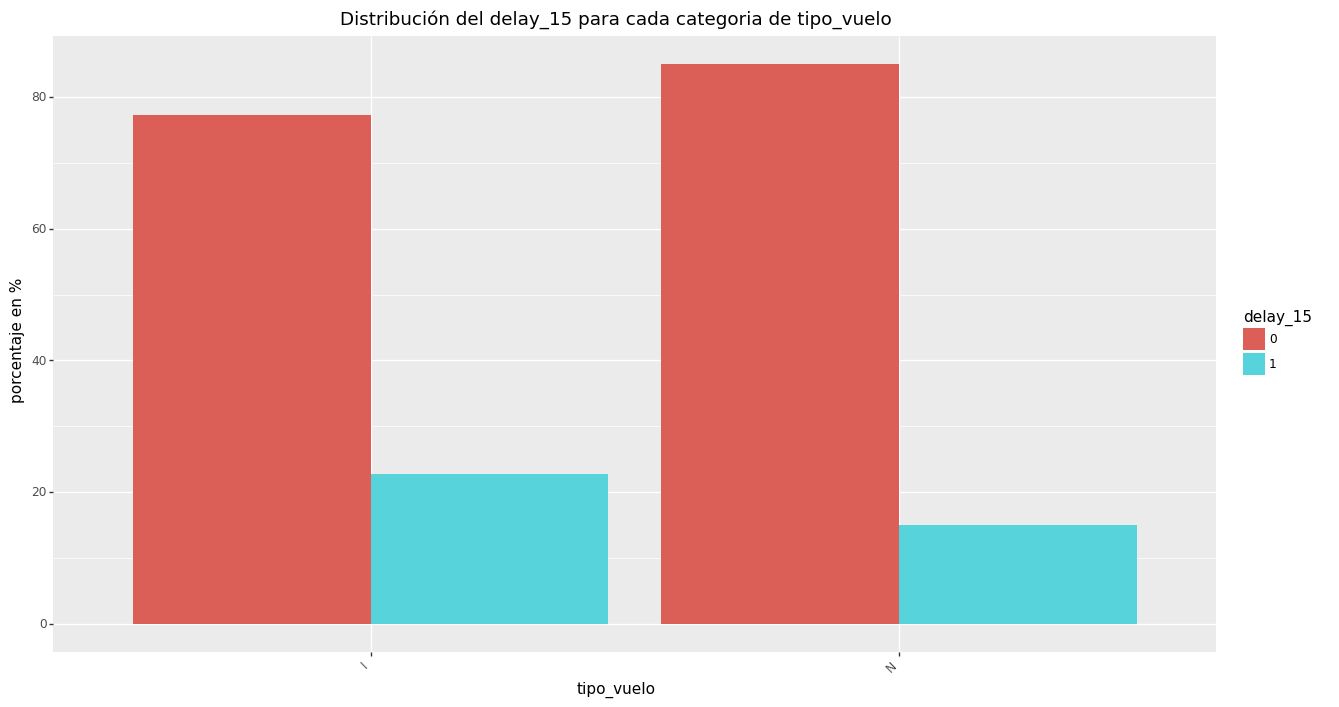

<ggplot: (6715871)>

In [51]:
# tipo_vuelo
g_x_label="tipo_vuelo"
# g_y_label="count_reg"
g_y_label="porcentaje en %"

g_fill_label="delay_15"
# g_title = (f"Distribución g_y_label} por"
#            f"\n {g_x_label} y segementado por {g_fill_label}")
g_title = (f"Distribución del {g_fill_label} para cada categoria de {g_x_label}"
)

df_g =exp_lib.df_groupby_subtotal(
                df_data,
                [g_x_label,g_fill_label],
              #   "id_vuelo"
                ).reset_index()

df_g[g_fill_label] = df_g[g_fill_label].astype("category")

graf_out =(ggplot(df_g, aes(x=g_x_label,
                                y=g_y_label,
                                fill=g_fill_label))
                                + geom_col(position=position_dodge(width=0.9))
                                +ggtitle(g_title)
                                +theme(axis_text_x = 
                                       element_text(angle=45, hjust=1),
                                       figure_size=(15,8))
                            #     + scale_x_discrete(limits= exp_lib.array_mes_name)
                )
graf_out

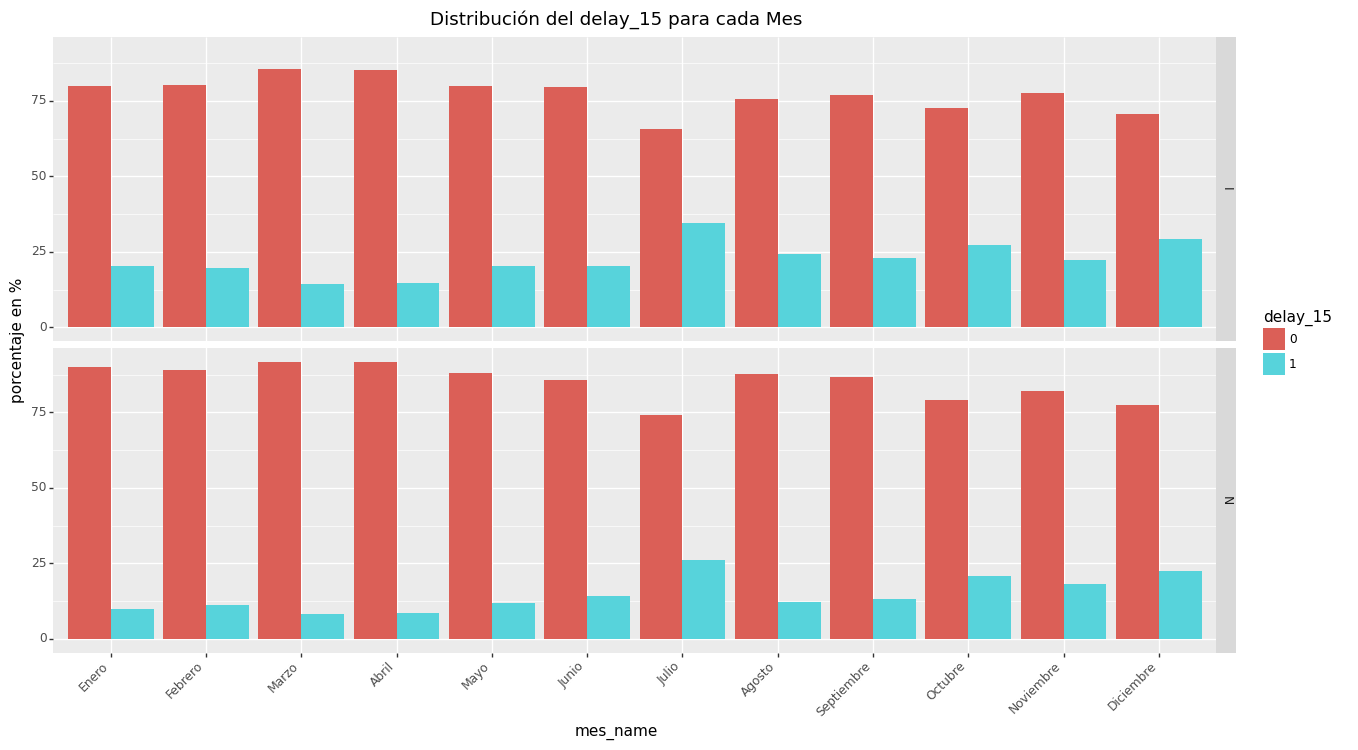

<ggplot: (17614583)>

In [53]:
# mes_name tipo_vuelo
g_x_label="mes_name"
g_y_label="porcentaje en %"
g_fill_label="delay_15"
left_grid = "tipo_vuelo"
rigth_grid = "."
facet_str =str( f"{left_grid} ~ {rigth_grid}")

g_title = (f"Distribución del {g_fill_label} para cada Mes"
)

df_g = exp_lib.df_groupby_subtotal(
                df_data,
                [left_grid ,g_x_label,g_fill_label],
              #   "id_vuelo"
                ).reset_index()

df_g[g_fill_label] = df_g[g_fill_label].astype("category")

graf_out =(ggplot(df_g, aes(x=g_x_label,
                                y=g_y_label,
                                fill=g_fill_label))
                                + geom_col(position=position_dodge(width=0.9))
                                +ggtitle(g_title)
                                +theme(axis_text_x = 
                                       element_text(angle=45, hjust=1),
                                       figure_size=(15,8))
                                + scale_x_discrete(limits= exp_lib.array_mes_name)
                              +facet_grid(facet_str)
                )
graf_out

#### Día de la semana

Se aprecia en general leves variaciones respecto al día de la semana, pero en sí , se destaca el día Viernes como el día con mayor proporcion de atrasos respecto al resto de los otros días y el día Domingo como el dia "más puntual" con tan solo 14.98% de atrasos registrados.

In [56]:
# dianom tabla
g_x_label="dianom"
# g_y_label="count_reg"
g_y_label="porcentaje en %"

g_fill_label="delay_15"
# g_title = (f"Distribución g_y_label} por"
#            f"\n {g_x_label} y segementado por {g_fill_label}")


df_g =exp_lib.df_groupby_subtotal(
                df_data,
                [g_x_label,g_fill_label],
              #   "id_vuelo"
                ).reset_index()

df_g[g_fill_label] = df_g[g_fill_label].astype("category")
df_g["dianom_num"]=df_g["dianom"].apply(dic_dianom.name_to_num)
df_g.sort_values(by = "dianom_num",ascending= True)

,index,dianom,delay_15,subtotal,total,porcentaje en %,dianom_num
4,4,Lunes,0.0,6678,8333,80.14,1
5,5,Lunes,1.0,1655,8333,19.86,1
8,6,Martes,0.0,6635,7933,83.64,2
9,7,Martes,1.0,1298,7933,16.36,2
6,8,Miercoles,0.0,6646,7956,83.53,3
7,9,Miercoles,1.0,1310,7956,16.47,3
0,2,Jueves,0.0,6787,8418,80.62,4
1,3,Jueves,1.0,1631,8418,19.38,4
2,12,Viernes,0.0,6532,8390,77.85,5
3,13,Viernes,1.0,1858,8390,22.15,5


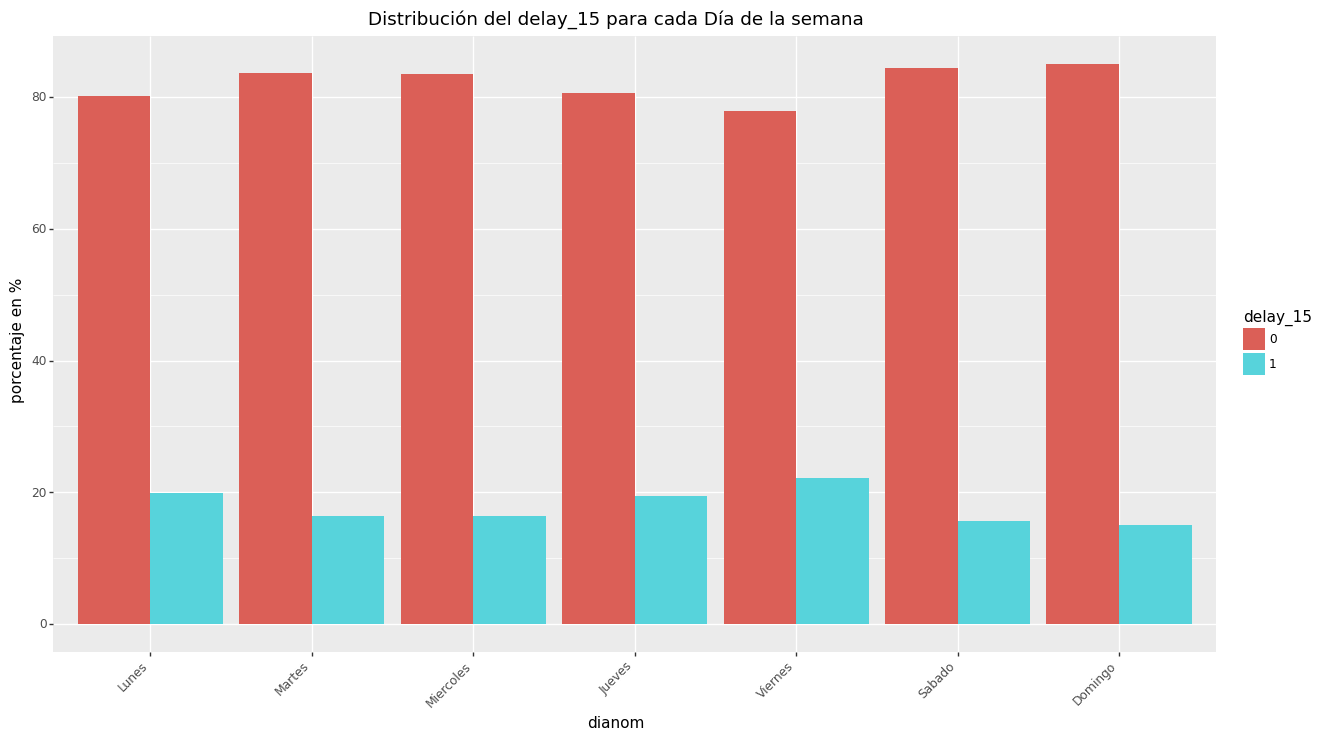

<ggplot: (6706776)>

In [57]:
# Distribución dia de la semana
g_title = (f"Distribución del {g_fill_label} para cada Día de la semana")
graf_out =(ggplot(df_g, aes(x=g_x_label,
                                y=g_y_label,
                                fill=g_fill_label))
                                + geom_col(position=position_dodge(width=0.9))
                                +ggtitle(g_title)
                                +theme(axis_text_x = 
                                       element_text(angle=45, hjust=1),
                                       figure_size=(15,8))
                                + scale_x_discrete(limits= ['Lunes', 'Martes', 'Miercoles','Jueves','Viernes', 'Sabado', 'Domingo'])
                )
graf_out

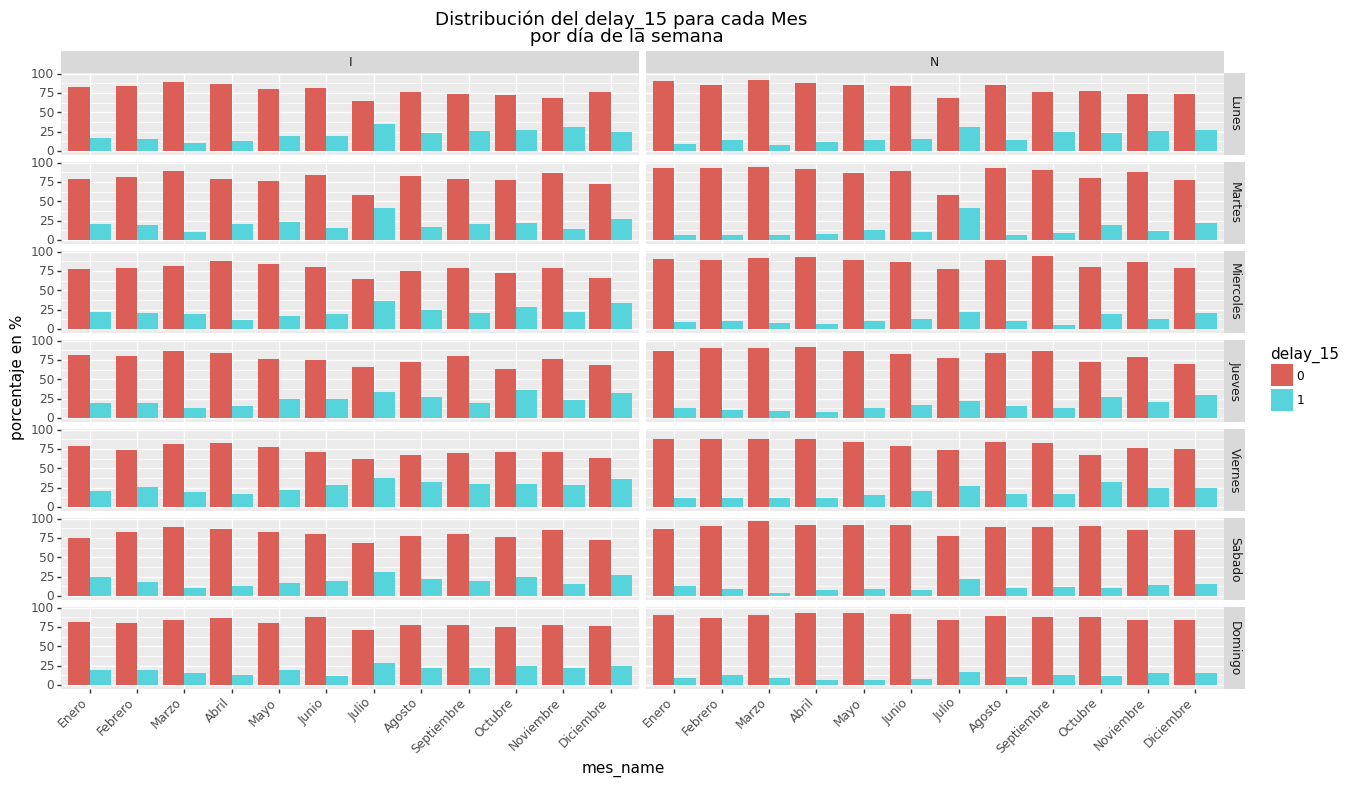

<ggplot: (21821766)>

In [59]:
# mes_name tipo_vuelo Dia de la semana
g_x_label="mes_name"
g_y_label="porcentaje en %"
g_fill_label="delay_15"
left_grid = "dianom"
rigth_grid = "tipo_vuelo" #"."
facet_str =str( f"{left_grid} ~ {rigth_grid}")

g_title = (f"Distribución del {g_fill_label} para cada Mes \n por día de la semana"
)

df_g = exp_lib.df_groupby_subtotal(
                df_data,
                [left_grid,rigth_grid,g_x_label,g_fill_label],
              #   "id_vuelo"
                ).reset_index()

df_g[g_fill_label] = df_g[g_fill_label].astype("category")
df_g[left_grid] =  pd.Categorical(df_g[left_grid], categories= ['Lunes', 'Martes', 'Miercoles','Jueves','Viernes', 'Sabado', 'Domingo'])
df_g[rigth_grid] = df_g[rigth_grid].astype("category")

graf_out =(ggplot(df_g, aes(x=g_x_label,
                                y=g_y_label,
                                fill=g_fill_label))
                                + geom_col(position=position_dodge(width=0.9))
                                +ggtitle(g_title)
                                +theme(axis_text_x = 
                                       element_text(angle=45, hjust=1),
                                       figure_size=(15,8))
                              +facet_grid(facet_str)
                              + scale_x_discrete(limits= exp_lib.array_mes_name)
                )
graf_out

#### Periodo del día

Se aprecia en general leves variaciones respecto al periodo de tiempo del día, este comportamiento a groso modo a medida que avanza el día y se aproxima la noche hay aumenta la proporción de vuelo atrasados, pasando de un 15.6% en la mañana a un 20.88% por la noche 

In [61]:
exp_lib.df_groupby_subtotal(df_data,["period_day","delay_15"])

,period_day,delay_15,subtotal,total,porcentaje en %
2,morning,0.0,18472,21885,84.40
3,morning,1.0,3413,21885,15.60
0,afternoon,0.0,17086,21010,81.32
1,afternoon,1.0,3924,21010,18.68
4,night,0.0,9874,12479,79.12
5,night,1.0,2605,12479,20.88


In [62]:
# Tabla dianom period_day
g_x_label="dianom"
# g_y_label="count_reg"
g_y_label="porcentaje en %"

g_fill_label="delay_15"
left_grid = "period_day"
rigth_grid = "." #"tipo_vuelo" #
facet_str =str( f"{left_grid} ~ {rigth_grid}")

df_g =exp_lib.df_groupby_subtotal(
                df_data,
                [g_x_label,left_grid,g_fill_label],
              #   "id_vuelo"
                ).reset_index()

df_g[g_fill_label] = df_g[g_fill_label].astype("category")
df_g["dianom_num"]=df_g["dianom"].apply(dic_dianom.name_to_num)
period_day_list = ["morning","afternoon","night"]
df_g[left_grid] =  pd.Categorical(df_g[left_grid], categories=period_day_list )
df_g.sort_values(by = "dianom_num",ascending= True)


,index,dianom,period_day,delay_15,subtotal,total,porcentaje en %,dianom_num
0,15,Lunes,morning,1.0,664,3475,19.11,1
1,14,Lunes,morning,0.0,2811,3475,80.89,1
35,17,Lunes,night,1.0,357,1801,19.82,1
34,16,Lunes,night,0.0,1444,1801,80.18,1
15,13,Lunes,afternoon,1.0,634,3057,20.74,1
14,12,Lunes,afternoon,0.0,2423,3057,79.26,1
39,22,Martes,night,0.0,1458,1752,83.22,2
38,23,Martes,night,1.0,294,1752,16.78,2
21,18,Martes,afternoon,0.0,2451,2961,82.78,2
20,19,Martes,afternoon,1.0,510,2961,17.22,2


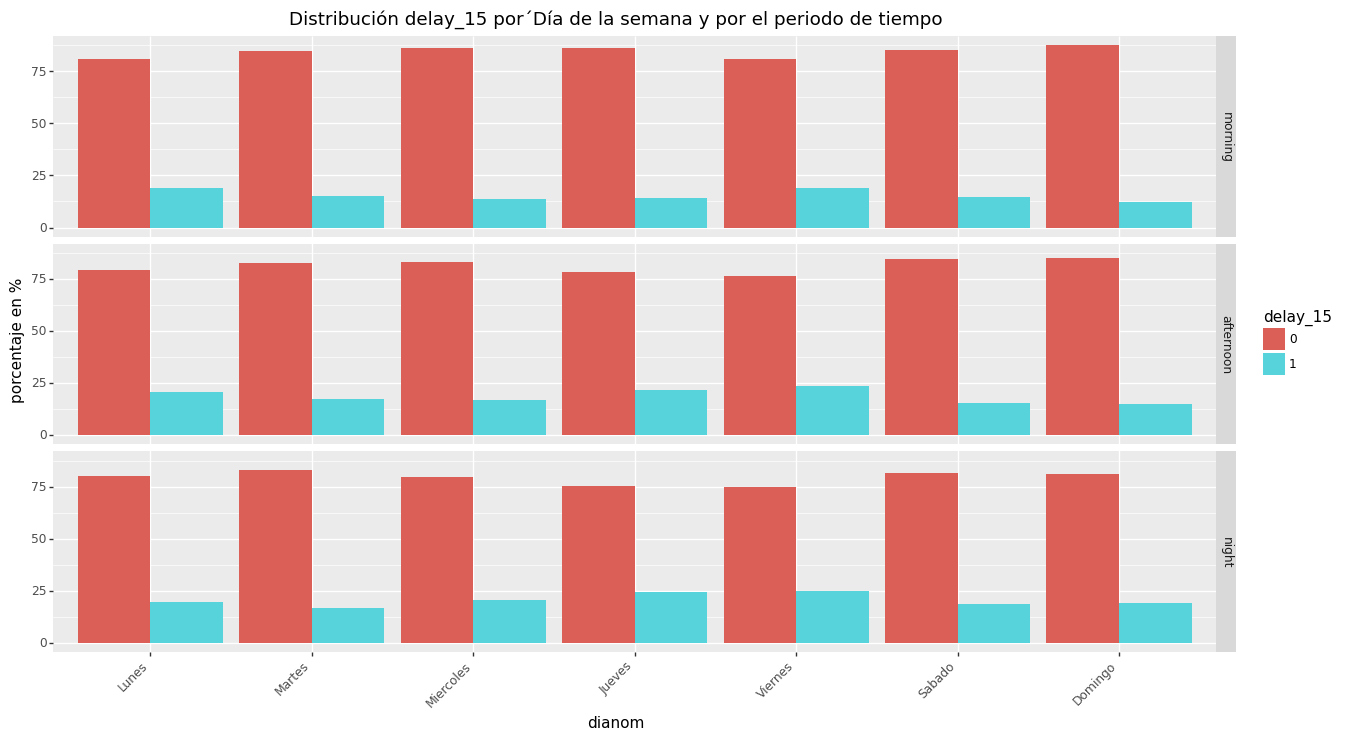

<ggplot: (17494775)>

In [63]:
# Grafico dianom period_day
g_title = (f"Distribución {g_fill_label} por"
           f"´Día de la semana y por el periodo de tiempo")
graf_out =(ggplot(df_g, aes(x=g_x_label,
                                y=g_y_label,
                                fill=g_fill_label))
                                + geom_col(position=position_dodge(width=0.9))
                                +ggtitle(g_title)
                                +theme(axis_text_x = 
                                       element_text(angle=45, hjust=1),
                                       figure_size=(15,8))
                              +facet_grid(facet_str)
                              + scale_x_discrete(limits= dic_dianom.list_name())
                )
graf_out

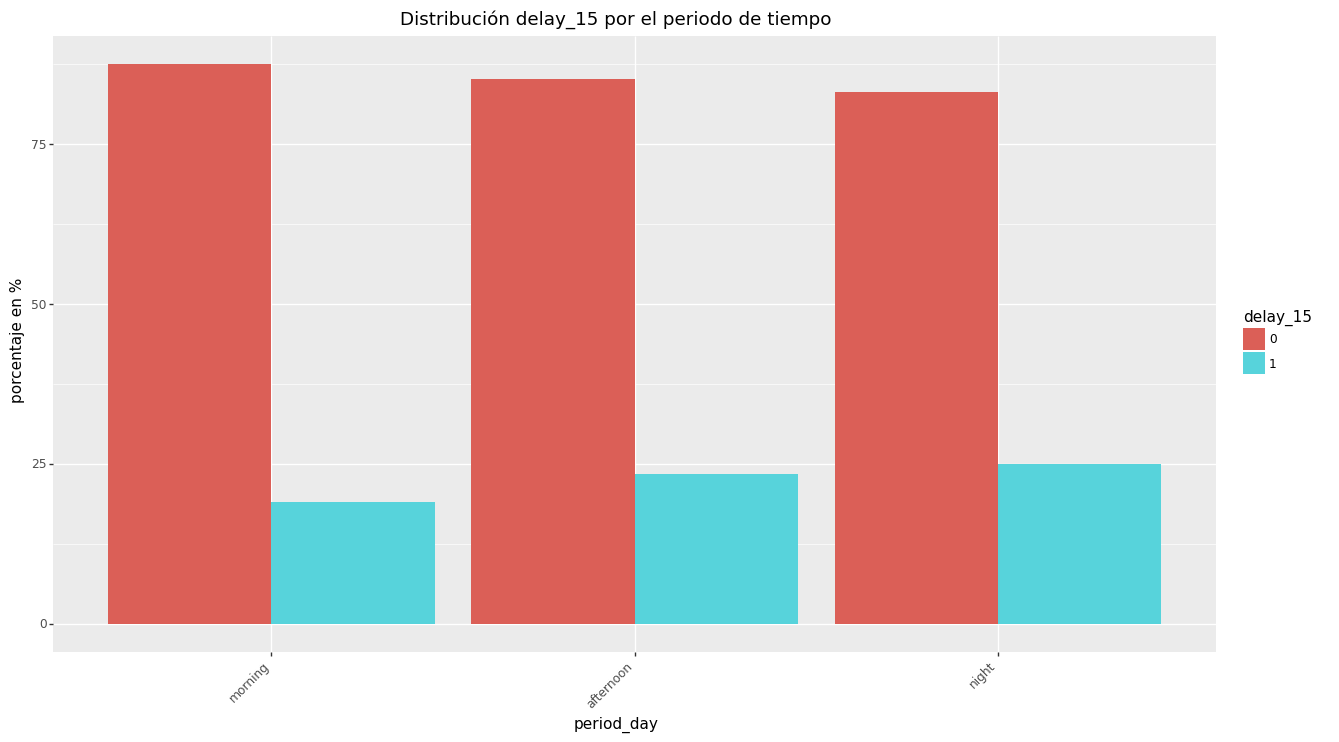

<ggplot: (17454418)>

In [64]:
g_title = (f"Distribución {g_fill_label} por el periodo de tiempo")
graf_out =(ggplot(df_g, aes(x=left_grid,
                                y=g_y_label,
                                fill=g_fill_label))
                                + geom_col(position=position_dodge(width=0.9))
                                +ggtitle(g_title)
                                +theme(axis_text_x = 
                                       element_text(angle=45, hjust=1),
                                       figure_size=(15,8))
                            #   +facet_grid(facet_str)
                              + scale_x_discrete(limits= period_day_list)
                )
graf_out

#### Temporada

Se vizualizó que en ciertos meses del año los retrasos sobre 15 min aumentaban en proporción a la cantidad de vuelos. Por lo cual se espera que este comportamiento se traspase tambien a la columna creada que refleja si el vuelo está en un rango de fecha de temporada alta. a simple vista se aprecia que la diferencia entre una categoria y otra es de un 1.1%. Pero esto no contampla el tipo de `high_season` . el cual es representado por `holidays_season`.

Se aprecia una más clara diferenciación respecto al tipo de temporada y el porcetaje de atrasos. Al contrastar además el tipo de vuelo, se apredcia que los vuelos internacionales en cada una de estas temporadas sobresalen por sobre los nacionales. 

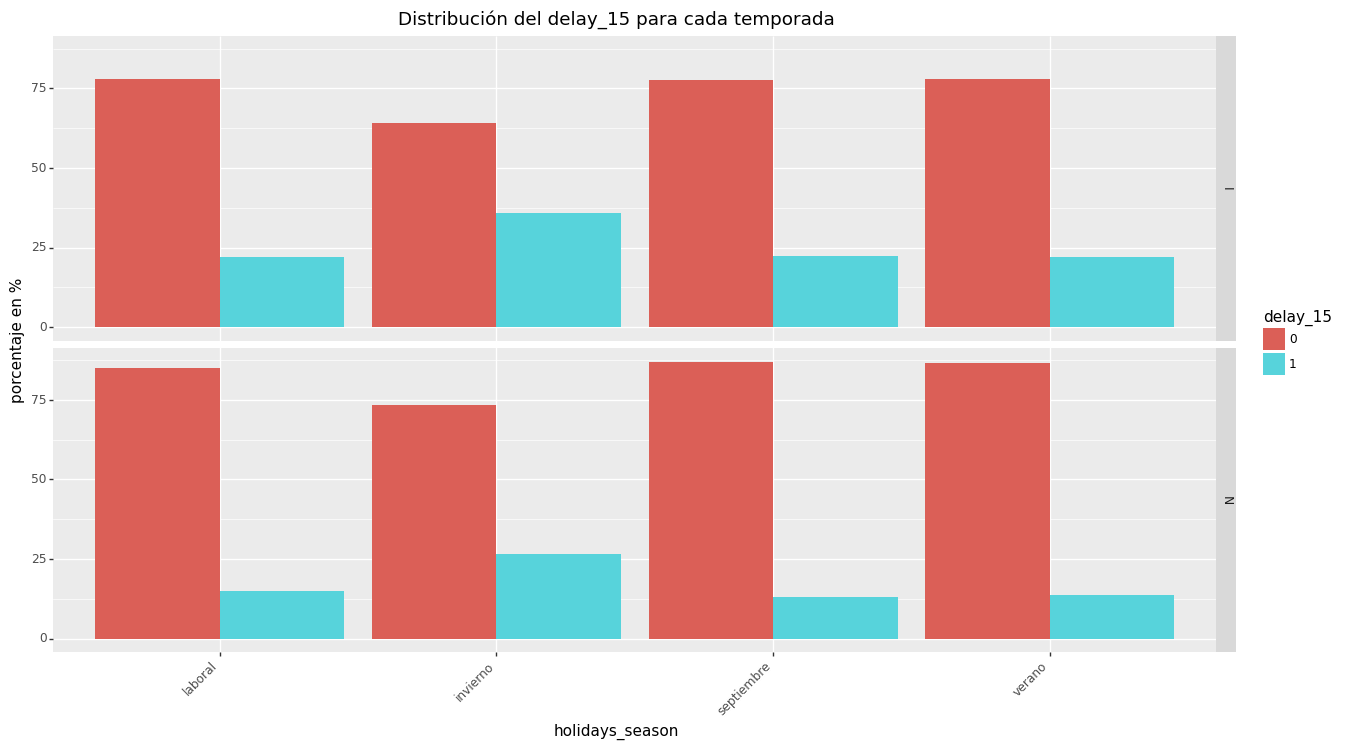

<ggplot: (19237419)>

In [66]:
# mes_name tipo_vuelo Dia de la semana
g_x_label="holidays_season"
g_y_label="porcentaje en %"
g_fill_label="delay_15"
left_grid = "tipo_vuelo"
rigth_grid = "." #"."
facet_str =str( f"{left_grid} ~ {rigth_grid}")

g_title = (f"Distribución del {g_fill_label} para cada temporada"
)
df_g = exp_lib.df_groupby_subtotal(
                df_data,
                [left_grid,g_x_label,g_fill_label],
              #   "id_vuelo"
                ).reset_index()
df_g[g_fill_label] = df_g[g_fill_label].astype("category")
graf_out =(ggplot(df_g, aes(x=g_x_label,
                                y=g_y_label,
                                fill=g_fill_label))
                                + geom_col(position=position_dodge(width=0.9))
                                +ggtitle(g_title)
                                +theme(axis_text_x = 
                                       element_text(angle=45, hjust=1),
                                       figure_size=(15,8))
                              +facet_grid(facet_str)
                              + scale_x_discrete(limits= [
                                "laboral","invierno","septiembre","verano"])
                )
graf_out

## Dataframe datos meteorologicos

**Información del archivo:**

> Estación meteorológica Pudahuel (aeropuerto), Chile, WMO_ID=85574, selección desde 30.12.2016 hasta 02.01.2018, todos los días

> Codificación: UTF-8

> Los datos han sido presentados por el sitio web "Real pronóstico", rp5.ru

> Por favor, al utilizar los datos mencione este sitio.

> Determinación de los parámetros meteorológicos en el enlace: 
    >> http://dev.rp5.ru.local/archive.php?wmo_id=27612&lang=en 
    >> http://rp5.ru/archive.php?wmo_id=85574&lang=es



In [67]:
# Parámetros de muestras:
dic_col_param_meteoro = {
"hora local en pudahuel (aeropuerto)": "",
"T": "Temperatura del aire (grados Celsius) en la altura de 2 metros sobre el terreno",
"P0": "P0, presión atmosférica en el nivel de la estación (milímetros de mercurio)",
"P": "P, presión atmosférica respecto al nivel del mar medio (milímetros de mercurio)",
"U": "U, humedad relativa (%) a la altura de 2 metros sobre la superficie de la tierra",
"DD": "DD, dirección del viento (rumba) a la altura de 10-12 metros sobre la superficie de la tierra promedio en 10 minutos antes del plazo de observación",
"FF":"FF, velocidad del viento a la altura de 10-12 metros sobre la superficie de la tierra en 10 minutos antes del plazo de observación (metros por segundo)",
"FF10": "FF10, valor máximo de las rachas de viento a la altura de 10-12 metros sobre la superficie de la tierra en 10 minutos antes del plazo de observación (metros por segundo)",
"WW":"",
"W'W'" : "",
"c" : "",
"VV": "VV, distancia horizontal de visibilidad (km)",
"Td" :"" ,
}

#### Download data and transform

In [85]:
# Extraccion datos climaticos pudahuel
df_clima_scl = exp_lib.extract_csv("data",
"85574_SCL_30_12_2016-01_01_2018",';')
df_clima_scl = df_clima_scl.rename( columns =
{i : i.lower()
for i in df_clima_scl.columns.to_list()})
df_clima_scl.describe(include = "all").T
# df_clima_scl.head().T

Dimensiones: (2792, 30)
Columnas 
 Hora local en Pudahuel (aeropuerto), T, Po, P, Pa, U, DD, Ff, ff10, ff3, N, WW, W1, W2, Tn, Tx, Cl, Nh, H, Cm, Ch, VV, Td, RRR, tR, E, Tg, E', sss, Unnamed: 29


,count,unique,top,freq
hora local en pudahuel (aeropuerto),2792,2792,01.01.2018 23:00,1
t,2791,346,10.2,23
po,2792,146,720.1,81
p,2791,187,761.5,58
pa,1444,51,0.0,81
u,2791,89,90,65
dd,2106,17,Viento procedente del sursureste,489
ff,2106,13,2,624
ff10,0,0,NaN,NaN
ff3,0,0,NaN,NaN


In [88]:
df_clima_scl['hora local en pudahuel (aeropuerto)'] = pd.to_datetime(df_clima_scl['hora local en pudahuel (aeropuerto)'], format="%d.%m.%Y %H:%M")
df_clima_scl['ano'] = df_clima_scl['hora local en pudahuel (aeropuerto)'].dt.year
df_clima_scl['mes'] = df_clima_scl['hora local en pudahuel (aeropuerto)'].dt.month
df_clima_scl['dia'] = df_clima_scl['hora local en pudahuel (aeropuerto)'].dt.day
df_clima_scl['hora'] = df_clima_scl['hora local en pudahuel (aeropuerto)'].dt.hour

In [165]:
exp_lib.columns_cast(df_clima_scl,[
't',
'po',
'p',
'u',
"vv"
 ],"float16")


hora local en pudahuel (aeropuerto)    datetime64[ns]
t                                             float16
po                                            float16
p                                             float16
pa                                             object
u                                             float16
dd                                             object
ff                                             object
ff10                                           object
ff3                                            object
n                                              object
ww                                             object
w1                                             object
w2                                             object
tn                                             object
tx                                             object
cl                                             object
nh                                             object
h                           

In [91]:
# Seteo de columnas en relacion a la fecha programada Fecha-I
df_data["ano"] = df_data.date_i.dt.year
df_data["mes"] = df_data.date_i.dt.month
df_data["dia"] = df_data.date_i.dt.day
df_data["hora"] = df_data.date_i.dt.hour

In [166]:
df_data_full = pd.merge(
    left = df_data,
    right = df_clima_scl,
    on = ["ano", "mes", "dia", "hora",],
    how = "left"
)
df_data_full.describe(include="all").T.tail(31)

C:\Users\rolf.traeger.brauti1\AppData\Local\Temp\ipykernel_27236\4224281598.py:7: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
C:\Users\rolf.traeger.brauti1\AppData\Local\Temp\ipykernel_27236\4224281598.py:7: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
C:\Users\rolf.traeger.brauti1\AppData\Local\Temp\ipykernel_27236\4224281598.py:7: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.


,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
hora,55374.0,NaN,NaN,NaN,NaT,NaT,12.028533,5.619778,0.0,7.0,12.0,17.0,23.0
hora local en pudahuel (aeropuerto),17401,2538,2017-02-17 08:00:00,16,2017-01-01 05:00:00,2017-12-31 20:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
t,17392.0,NaN,NaN,NaN,NaT,NaT,inf,7.707031,-3.599609,10.0,15.203125,21.5,36.09375
po,17401.0,NaN,NaN,NaN,NaT,NaT,inf,2.638672,715.0,719.0,720.5,722.5,731.0
p,17393.0,NaN,NaN,NaN,NaT,NaT,inf,3.560547,754.5,759.5,762.0,764.5,774.5
pa,9426,51,0.9,568,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
u,17392.0,NaN,NaN,NaN,NaT,NaT,inf,22.546875,9.0,44.0,62.0,82.0,100.0
dd,12910,17,Viento procedente del sur,3072,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ff,12910,13,2,3795,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ff10,0,0,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Chi-cuadrado sobre columnas del cliema
Al considerar el cuadro siguiente, se aprecian las columnas con mas significacia, pero la primera y con mejores métricas es la que posee más grados de livertad, lo cual la vuelve una variable demasiado especifica y podria desencadenar un overfitting. Las variables que siguen en ranquin son temperatura y humedad.

In [167]:
list_col_clima = ['t',  'po',  'p',  'u',  'ww',"vv" ]
col_x = list_col_clima
y_col = "delay_15"
exp_lib.dataframe_chi_sqr(df_data_full,col_x,y_col).reset_index().drop(columns=["index"])

['t' 'ww' 'vv' 'u' 'p' 'po']


,columna,Chi-cuadrad,p-valor,Grados_de_libertad
0,t,700.754381,1.992943e-26,345
1,ww,195.511462,8.836846e-26,31
2,vv,134.867008,3.246696e-18,22
3,u,212.144920,2.981277e-12,88
4,p,120.223605,5.879775e-10,40
5,po,84.557878,1.248237e-06,32


#### VV, distancia horizontal de visibilidad (km)

El porcentaje de los vuelos con atrasos según la visibilidad dentro en el aeropuesto de pudahuel se presenta una diferenciacion. 
Respecto a tomar en cuenta esta caracteristica como representativa, tan solo el 19.5% (10799) de los vuelos poseen un valor en esta caracteristica. Lo cual requiere un tratamiento mayor como un rellenado de los datos faltantes según la fecha.

Por otro lado, el 59.2% de los vuelos registrados son vuelos que posee una visibilidad superior o igual a 10 km y el 18.54% de estos terminan en un atraso. Es más el resto de los escenarios donde hay menos visibiliad a este valor es variable inclusive menor, considerando la poca cantidad de registros, es dificil realizar una afirmación.

In [175]:
print("% de registros con datos",df_data_full.vv.count() / df_data_full.shape[0] * 100,"%")
df_data_full.vv.describe()

% de registros con datos 19.501932314804783 %


count    1.079900e+04
mean              inf
std      2.654297e+00
min      9.997559e-02
25%      7.000000e+00
50%      1.000000e+01
75%      1.000000e+01
max      1.200000e+01
Name: vv, dtype: float64

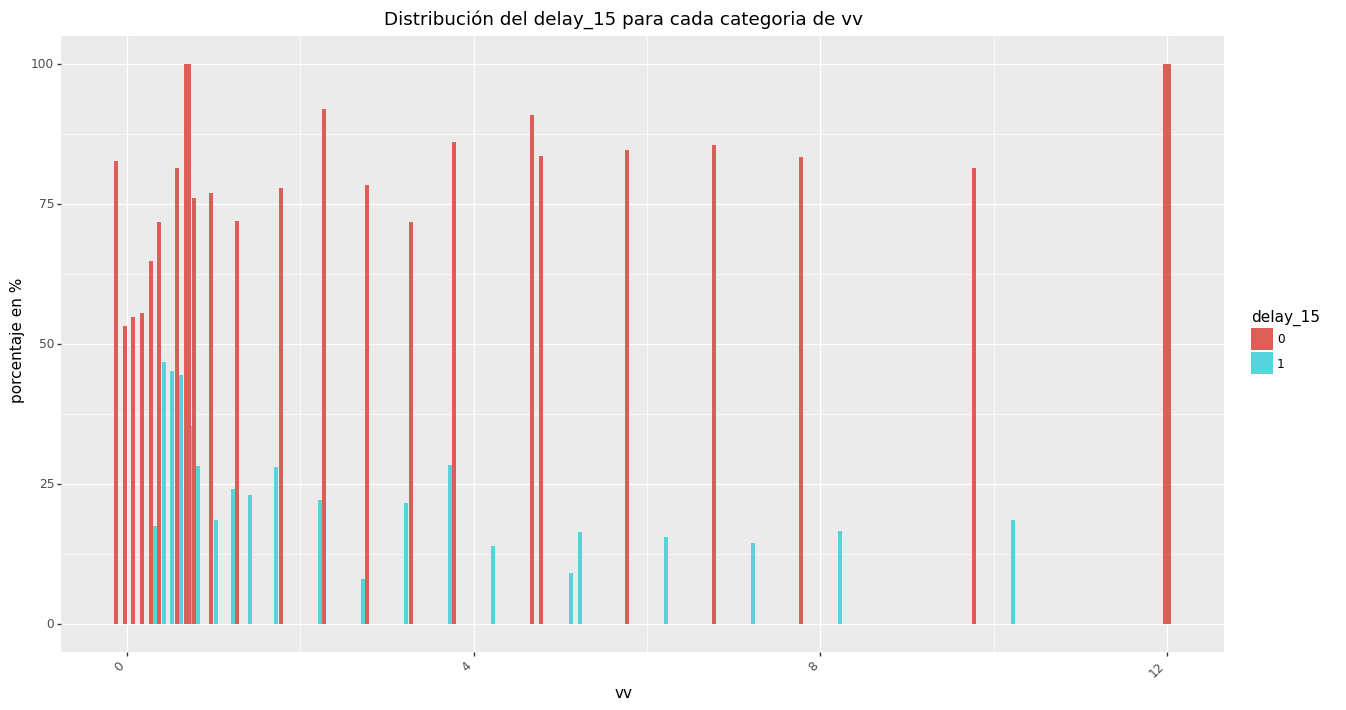

<ggplot: (19600622)>

In [176]:
# Visivilidad
g_x_label="vv"
# g_y_label="count_reg"
g_y_label="porcentaje en %"

g_fill_label="delay_15"
# g_title = (f"Distribución g_y_label} por"
#            f"\n {g_x_label} y segementado por {g_fill_label}")
g_title = (f"Distribución del {g_fill_label} para cada categoria de {g_x_label}"
)

df_g = exp_lib.df_groupby_subtotal(
                df_data_full,
                [g_x_label,g_fill_label],
              #   "id_vuelo"
                ).reset_index()

df_g[g_fill_label] = df_g[g_fill_label].astype("category")

graf_out =(ggplot(df_g, aes(x=g_x_label,
                                y=g_y_label,
                                fill=g_fill_label))
                                + geom_col(position=position_dodge(width=0.9))
                                +ggtitle(g_title)
                                +theme(axis_text_x = 
                                       element_text(angle=45, hjust=1),
                                       figure_size=(15,8))
                                # + scale_x_discrete(limits= orden_vv)
                )
graf_out

In [185]:
print(df_g[df_g.vv >= 10].sum().subtotal /
df_g.sum().subtotal)
df_g[
    (df_g[g_fill_label ] ==1)
    #  (df_g["index"] ==22)
    ]
    # .total.sum()

0.5919066580238911


C:\Users\rolf.traeger.brauti1\AppData\Local\Temp\ipykernel_27236\1398049182.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
C:\Users\rolf.traeger.brauti1\AppData\Local\Temp\ipykernel_27236\1398049182.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.


,index,vv,delay_15,subtotal,total,porcentaje en %
1,42,10.000000,1.0,1184,6386,18.54
3,40,8.000000,1.0,273,1645,16.60
5,38,7.000000,1.0,86,594,14.48
6,34,5.000000,1.0,78,474,16.46
9,36,6.000000,1.0,69,446,15.47
10,30,4.000000,1.0,36,258,13.95
13,26,3.000000,1.0,52,240,21.67
15,22,2.000000,1.0,39,176,22.16
17,20,1.500000,1.0,28,100,28.00
18,3,0.199951,1.0,43,92,46.74


In [189]:
df_g[
    (df_g[g_fill_label ] ==1)
    & (df_g["vv"] <10)
    ]

,index,vv,delay_15,subtotal,total,porcentaje en %
3,40,8.000000,1.0,273,1645,16.60
5,38,7.000000,1.0,86,594,14.48
6,34,5.000000,1.0,78,474,16.46
9,36,6.000000,1.0,69,446,15.47
10,30,4.000000,1.0,36,258,13.95
13,26,3.000000,1.0,52,240,21.67
15,22,2.000000,1.0,39,176,22.16
17,20,1.500000,1.0,28,100,28.00
18,3,0.199951,1.0,43,92,46.74
20,5,0.300049,1.0,28,62,45.16


In [150]:
(df_g[
    (df_g[g_fill_label ] ==1)
    & (df_g["vv"] <=10)
    ].subtotal.sum()
/
df_g[
    (df_g[g_fill_label ] ==1)
    & (df_g["index"] !=22)
    ].total.sum())

0.18413275744487384

In [151]:
df_g[df_g[g_fill_label ] ==1]
df_data_full[df_data_full["vv"] =="0.7"].T

,6445,6446,6447,6448,6449,6450,6451,6452
id_vuelo,23133,24221,24489,24957,25172,25419,26095,26907
tipo_vuelo,I,I,N,N,N,N,I,I
opera,Grupo LATAM,Sky Airline,Grupo LATAM,Grupo LATAM,Grupo LATAM,Grupo LATAM,Grupo LATAM,Grupo LATAM
to_city,Rio de Janeiro,Montevideo,Antofagasta,Concepcion,Temuco,Puerto Montt,Montevideo,Sao Paulo
date_i,2017-05-09 08:45:00,2017-05-09 08:30:00,2017-05-09 08:40:00,2017-05-09 08:25:00,2017-05-09 08:00:00,2017-05-09 08:30:00,2017-05-09 08:50:00,2017-05-09 08:25:00
dia,9,9,9,9,9,9,9,9
dianom,Martes,Martes,Martes,Martes,Martes,Martes,Martes,Martes
mes,5,5,5,5,5,5,5,5
mes_name,Mayo,Mayo,Mayo,Mayo,Mayo,Mayo,Mayo,Mayo
holidays_season,laboral,laboral,laboral,laboral,laboral,laboral,laboral,laboral


#### Temperatura del aire (grados Celsius) en la altura de 2 metros sobre el terreno
Se aprecia que no cambia significativamente la proporcióm, pero se aprecia una tendencia, a medida que disminuye la temperatura, aumenta el porcentaje de retrasos

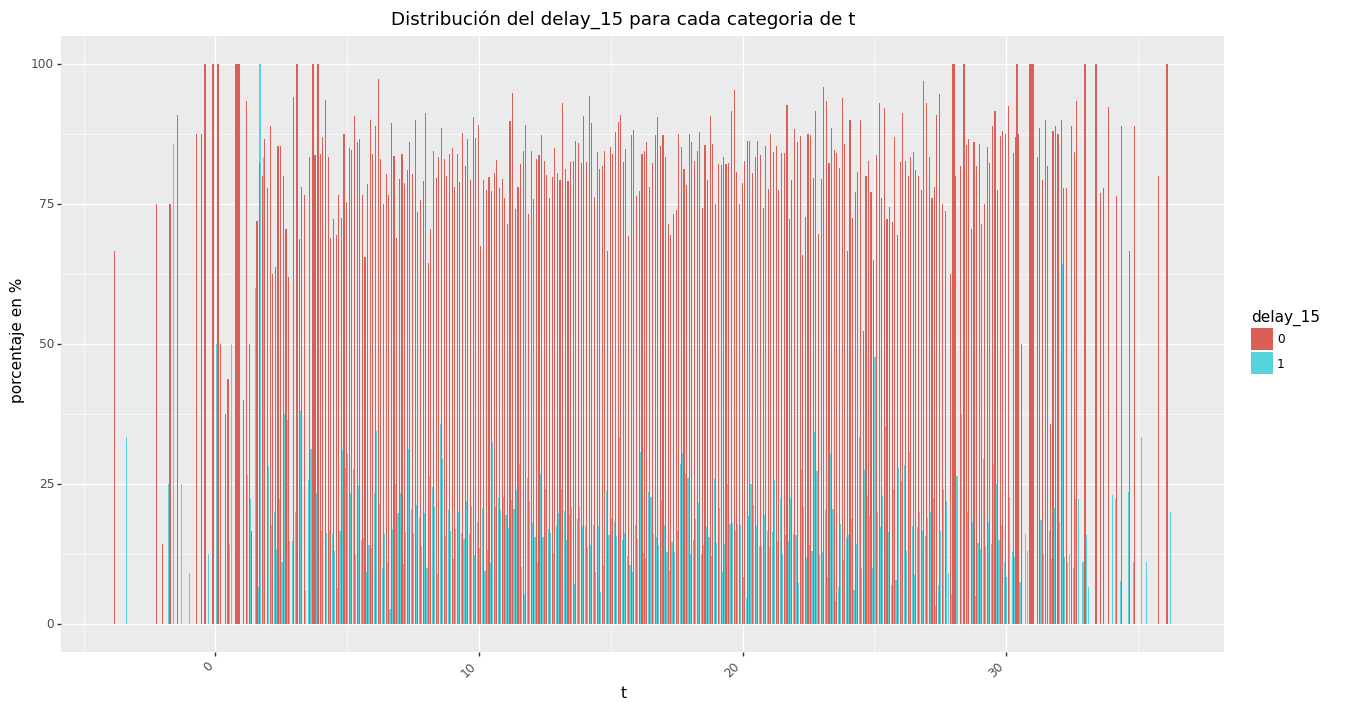

<ggplot: (19026170)>

In [106]:
# Temperatura
g_x_label="t"
# g_y_label="count_reg"
g_y_label="porcentaje en %"

g_fill_label="delay_15"
# g_title = (f"Distribución g_y_label} por"
#            f"\n {g_x_label} y segementado por {g_fill_label}")
g_title = (f"Distribución del {g_fill_label} para cada categoria de {g_x_label}"
)

df_g = exp_lib.df_groupby_subtotal(
                df_data_full,
                [g_x_label,g_fill_label],
              #   "id_vuelo"
                ).reset_index()

df_g[g_fill_label] = df_g[g_fill_label].astype("category")

graf_out =(ggplot(df_g, aes(x=g_x_label,
                                y=g_y_label,
                                fill=g_fill_label))
                                + geom_col(position=position_dodge(width=0.9))
                                +ggtitle(g_title)
                                +theme(axis_text_x = 
                                       element_text(angle=45, hjust=1),
                                       figure_size=(15,8))
                                # + scale_x_discrete(limits= orden_vv)
                )
graf_out

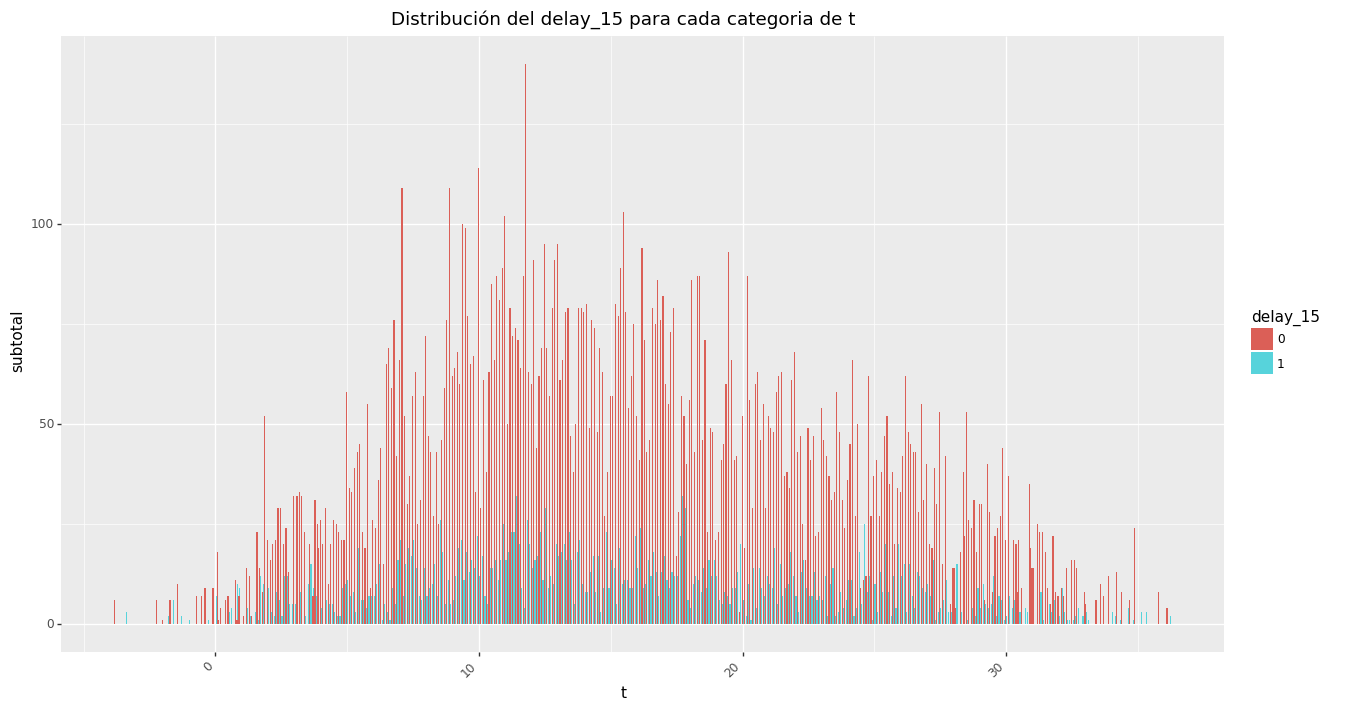

<ggplot: (19383712)>

In [107]:
# Temperatura
g_x_label="t"
# g_y_label="count_reg"
g_y_label="subtotal"

g_fill_label="delay_15"
# g_title = (f"Distribución g_y_label} por"
#            f"\n {g_x_label} y segementado por {g_fill_label}")
g_title = (f"Distribución del {g_fill_label} para cada categoria de {g_x_label}"
)

df_g = exp_lib.df_groupby_subtotal(
                df_data_full,
                [g_x_label,g_fill_label],
              #   "id_vuelo"
                ).reset_index()

df_g[g_fill_label] = df_g[g_fill_label].astype("category")

graf_out =(ggplot(df_g, aes(x=g_x_label,
                                y=g_y_label,
                                fill=g_fill_label))
                                + geom_col(position=position_dodge(width=0.9))
                                +ggtitle(g_title)
                                +theme(axis_text_x = 
                                       element_text(angle=45, hjust=1),
                                       figure_size=(15,8))
                                # + scale_x_discrete(limits= orden_vv)
                )
graf_out

#### U, humedad relativa (%) a la altura de 2 metros sobre la superficie de la tierra
La humedad se considera segun las metricas de Chi-cuadrado como variable influyente, pero debido al comportamiento del grafico, esta variable posee baivenes varios.

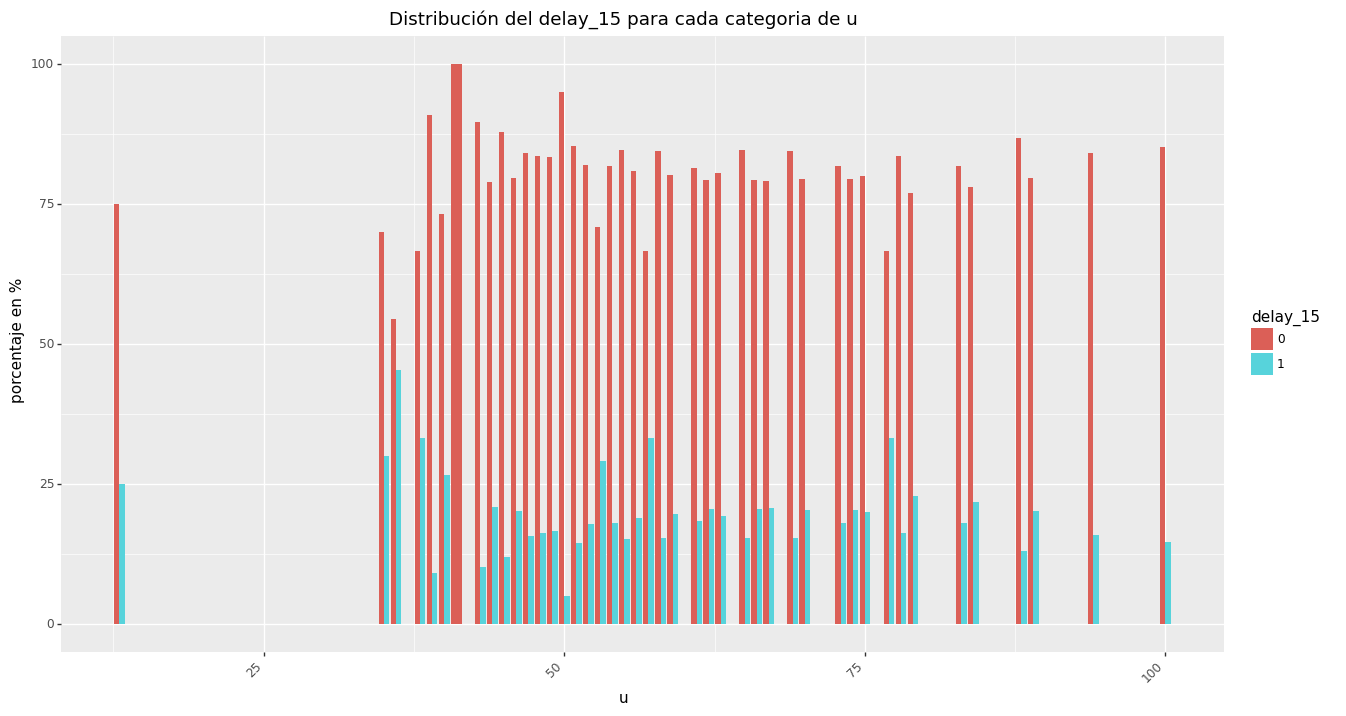

<ggplot: (29918862)>

In [ ]:
# Humedad
g_x_label="u"
# g_y_label="count_reg"
g_y_label="porcentaje en %"

g_fill_label="delay_15"
# g_title = (f"Distribución g_y_label} por"
#            f"\n {g_x_label} y segementado por {g_fill_label}")
g_title = (f"Distribución del {g_fill_label} para cada categoria de {g_x_label}"
)

df_g = df_groupby_subtotal(
                df_data_full,
                [g_x_label,g_fill_label],
              #   "id_vuelo"
                ).reset_index()

df_g[g_fill_label] = df_g[g_fill_label].astype("category")

graf_out =(ggplot(df_g, aes(x=g_x_label,
                                y=g_y_label,
                                fill=g_fill_label))
                                + geom_col(position=position_dodge(width=0.9))
                                +ggtitle(g_title)
                                +theme(axis_text_x = 
                                       element_text(angle=45, hjust=1),
                                       figure_size=(15,8))
                                # + scale_x_discrete(limits= orden_vv)
                )
graf_out

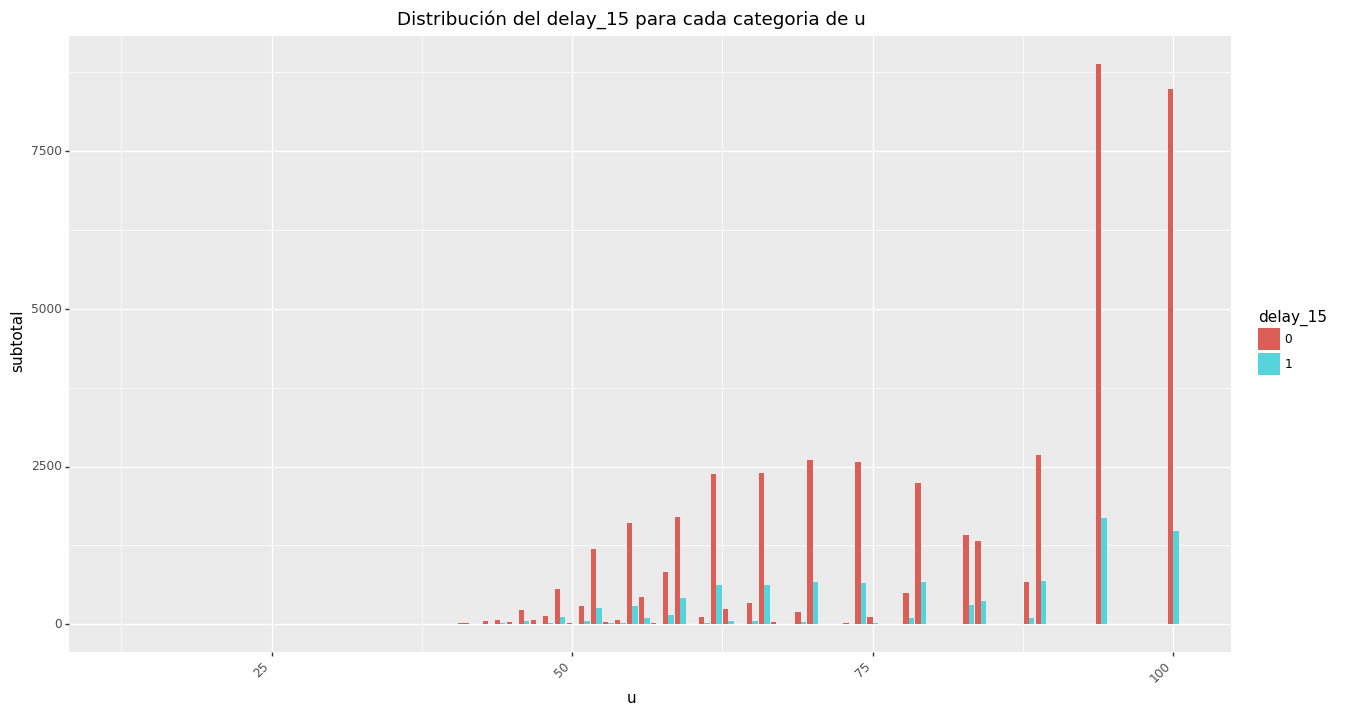

<ggplot: (27052963)>

In [ ]:
# Humedad
g_x_label="u"
# g_y_label="count_reg"
g_y_label="subtotal"

g_fill_label="delay_15"
# g_title = (f"Distribución g_y_label} por"
#            f"\n {g_x_label} y segementado por {g_fill_label}")
g_title = (f"Distribución del {g_fill_label} para cada categoria de {g_x_label}"
)

df_g = df_groupby_subtotal(
                df_data_full,
                [g_x_label,g_fill_label],
              #   "id_vuelo"
                ).reset_index()

df_g[g_fill_label] = df_g[g_fill_label].astype("category")

graf_out =(ggplot(df_g, aes(x=g_x_label,
                                y=g_y_label,
                                fill=g_fill_label))
                                + geom_col(position=position_dodge(width=0.9))
                                +ggtitle(g_title)
                                +theme(axis_text_x = 
                                       element_text(angle=45, hjust=1),
                                       figure_size=(15,8))
                                # + scale_x_discrete(limits= orden_vv)
                )
graf_out

# 4 Train one or several models (using the algorithm(s) of your choice) to estimate the likelihood of a flight delay. Feel free to generate additional variables and/or supplement with external variables.

## Definición de los datos

### Rellenado de valores faltantes

In [283]:
def condition_fill(df_mean_val,df, col_name ,col_merge = "mes_name"):
    # print(#df_mean_val,
    # df, col_name ,col_merge)
    if np.isnan(df[col_name]):
        m_val =df[col_merge]
        return df_mean_val[df_mean_val[col_merge] == m_val][col_name].iloc[0]
    else:
        return df[col_name]

# condition_fill(df_clima_mean,df_data_full.head(1), "vv" ,col_merge = "mes_name")

In [284]:
def fill_col(df,df_fill_mean,col_name):
    # print(df,df_fill_mean,col_name)
    df_out = df.copy()
    df_out[col_name] = \
        df_out\
            .apply(lambda dfx: (
                            condition_fill(df_fill_mean, dfx ,col_name)), 
                            axis = 1)
    return df_out

In [ ]:
clima_col =['po', 'u', 'vv','t', ]
df_clima_mean=df_data_full.groupby("mes_name").mean()[clima_col].reset_index()
df_clima_mean.describe()

,po,u,vv,t
count,12.000000,12.00000,12.000000,12.000000
mean,720.500000,61.28125,8.117188,16.046875
std,1.602539,13.18750,1.406250,5.710938
min,718.500000,41.68750,5.871094,8.710938
25%,719.375000,50.18750,6.583008,10.957031
50%,721.000000,58.21875,8.722656,15.902344
75%,722.125000,76.21875,9.296875,20.433594
max,723.000000,78.62500,9.492188,24.875000


In [287]:
for i in  clima_col:
    df_data_full= fill_col(df_data_full,df_clima_mean,col_name = i)

### Estudio de las columnas
Dado que todas las columnas son representativas y en conjunto representan los atrasos, se continua trabajando con todas ellas. En esta ocacion el orden de la incorporacion, se considero los grados de libertad acendentes

In [293]:
columns_to_use = [
    'tipo_vuelo', 'opera', 'to_city',  'dianom', 'mes_name', 'holidays_season',
    'period_day', 
    'po', 'u', 'vv',
    't', 
    'Vlo-I', 
     ]
col_x = columns_to_use
y_col = "delay_15"
df_chi=exp_lib.dataframe_chi_sqr(df_data_full,col_x,y_col).reset_index().drop(columns=["index"])
df_chi

['Vlo-I' 'mes_name' 'vv' 'to_city' 'opera' 'u' 't' 'tipo_vuelo' 'po'
 'holidays_season' 'dianom' 'period_day']


,columna,Chi-cuadrad,p-valor,Grados_de_libertad
0,Vlo-I,3704.542641,0.000000e+00,465
1,mes_name,1119.282773,3.990905e-233,11
2,vv,1138.041416,4.479607e-217,34
3,to_city,1006.964032,2.915609e-203,17
4,opera,885.697753,4.641081e-188,6
5,u,1031.880854,3.943451e-155,99
6,t,1543.483562,3.075039e-147,356
7,tipo_vuelo,525.327610,2.934006e-116,1
8,po,592.039018,2.607162e-104,32
9,holidays_season,300.868542,6.453435e-65,3


In [297]:
order_col=(df_chi
            .sort_values(by = "Grados_de_libertad",ascending= True)
                .columna.unique().tolist())
# order_col.pop(order_col.index("t")) # tiene demaciados grados de libertad
# order_col.pop(order_col.index('Vlo-I')) # tiene demaciados grados de libertad
col_x = [order_col[:i] for i in range(1,len(order_col)+1)]
y_col = "delay_15"

chi_de_i = {
    "/".join(i) : 
        exp_lib.chi_cuadrado_func(df_data_full, i ,y_col)
    for i in col_x 
    }
col_x_df =  ["/".join(i) for i in col_x ]
df_chi_combinado=pd.DataFrame({
    "columna" : col_x_df,
    "Chi-cuadrad": [ chi_de_i[i][0] for i in col_x_df],
    "p-valor": [ chi_de_i[i][1] for i in col_x_df],
    "Grados_de_libertad" : [ chi_de_i[i][2] for i in col_x_df],
})
df_chi_combinado

,columna,Chi-cuadrad,p-valor,Grados_de_libertad
0,tipo_vuelo,525.327610,2.934006e-116,1
1,tipo_vuelo/period_day,737.047291,4.786770e-157,5
2,tipo_vuelo/period_day/holidays_season,1074.849981,1.587291e-212,23
3,tipo_vuelo/period_day/holidays_season/opera,2789.389111,0.000000e+00,117
4,tipo_vuelo/period_day/holidays_season/opera/di...,4233.556547,0.000000e+00,776
5,tipo_vuelo/period_day/holidays_season/opera/di...,8062.010578,0.000000e+00,2716
6,tipo_vuelo/period_day/holidays_season/opera/di...,15116.959245,7.260754e-234,9811
7,tipo_vuelo/period_day/holidays_season/opera/di...,26134.173026,1.122879e-76,22022
8,tipo_vuelo/period_day/holidays_season/opera/di...,27586.279672,3.752970e-63,23751
9,tipo_vuelo/period_day/holidays_season/opera/di...,28956.089790,7.229476e-56,25261


### Guardado data de estudio 
Tomando en cuenta que se utilizarán contadas columnas se guardará una data con las principales columnas para el modelo predictivo

In [301]:
columns_to_use = [
    'tipo_vuelo', 'opera', 'to_city',  'dianom', 'mes_name', 'holidays_season',
    'period_day', 
    'po', 'u', 'vv',
    't', 
    'Vlo-I', 
     ]
df_data_fit = df_data_full[ ["delay_15"] + columns_to_use]

df_data_fit.dtypes

delay_15           float16
tipo_vuelo          object
opera               object
to_city             object
dianom              object
mes_name            object
holidays_season     object
period_day          object
po                 float64
u                  float64
vv                 float64
t                  float64
Vlo-I               object
dtype: object

In [302]:
# df_data_fit.to_csv('data/scl_data_fit.csv',index=False,sep=",") 

## Extract tabla de estudio

In [15]:
try:        # Modifica desde el csv synthetic_features
    data = exp_lib.extract_csv("data","scl_data_fit",',')
    print("Extract complete : scl_data_fit")
    exp_lib.columns_cast(data,['delay_15', "po", "u", "vv", "t", ],"float16")
except:         # Modifica desde el origen
    df_clima_scl = exp_lib.extract_csv("data",
    "85574_SCL_30_12_2016-01_01_2018",';')
    df_clima_scl = df_clima_scl.rename( columns =
    {i : i.lower()
    for i in df_clima_scl.columns.to_list()})
    df_clima_scl['hora local en pudahuel (aeropuerto)'] = pd.to_datetime(df_clima_scl['hora local en pudahuel (aeropuerto)'], format="%d.%m.%Y %H:%M")
    df_clima_scl['ano'] = df_clima_scl['hora local en pudahuel (aeropuerto)'].dt.year
    df_clima_scl['mes'] = df_clima_scl['hora local en pudahuel (aeropuerto)'].dt.month
    df_clima_scl['dia'] = df_clima_scl['hora local en pudahuel (aeropuerto)'].dt.day
    df_clima_scl['hora'] = df_clima_scl['hora local en pudahuel (aeropuerto)'].dt.hour
    exp_lib.columns_cast(df_clima_scl,[
        't',
        'po',
        'p',
        'u',
        "vv"
        ],"float16")
    df_data = exp_lib.extract_csv("data","synthetic_features",',')
    df_data = exp_lib.df_filter_count_for_category(
    exp_lib.df_filter_count_for_category(
        exp_lib.df_filter_count_for_category(
            df_data,
            "to_city")
                ,"opera")
                    ,"to_city")
    df_data["date_i"] = df_data["date_i"].apply(exp_lib.convert_to_date)
    df_data["ano"] = df_data.date_i.dt.year
    df_data["mes"] = df_data.date_i.dt.month
    df_data["dia"] = df_data.date_i.dt.day
    df_data["hora"] = df_data.date_i.dt.hour
    df_data["mes_name"]=df_data.MES.astype("int16").apply(dic_med.int_to_name)
    # Union
    df_data = pd.merge(
    left = df_data,
    right = df_clima_scl,
    on = ["ano", "mes", "dia", "hora",],
    how = "left")
    clima_col =['po', 'u', 'vv','t', ]
    df_clima_mean=df_data_full.groupby("mes_name").mean()[clima_col].reset_index()
    for i in  clima_col:
        df_data= fill_col(df_data,df_clima_mean,col_name = i)
    columns_to_use = [
    'tipo_vuelo', 'opera', 'to_city',  'dianom', 'mes_name', 'holidays_season',
    'period_day', 
    'po', 'u', 'vv',
    't', 
    'Vlo-I', 
     ]
    data = df_data[ ["delay_15"] + columns_to_use]

data_o = data.copy()
data.describe( include = "all") 

Dimensiones: (55374, 13)
Columnas 
 delay_15, tipo_vuelo, opera, to_city, dianom, mes_name, holidays_season, period_day, po, u, vv, t, Vlo-I
Extract complete : scl_data_fit
delay_15           float16
tipo_vuelo          object
opera               object
to_city             object
dianom              object
mes_name            object
holidays_season     object
period_day          object
po                 float16
u                  float16
vv                 float16
t                  float16
Vlo-I               object
dtype: object


,delay_15,tipo_vuelo,opera,to_city,dianom,mes_name,holidays_season,period_day,po,u,vv,t,Vlo-I
count,55374.000000,55374,55374,55374,55374,55374,55374,55374,5.537400e+04,55374.0000,5.537400e+04,5.537400e+04,55374
unique,NaN,2,7,18,7,12,4,3,NaN,NaN,NaN,NaN,466
top,NaN,N,Grupo LATAM,Antofagasta,Jueves,Diciembre,laboral,morning,NaN,NaN,NaN,NaN,174
freq,NaN,34349,34488,5786,8418,5000,37000,21885,NaN,NaN,NaN,NaN,686
mean,0.179443,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf,inf,inf,inf,NaN
std,0.383789,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.951172e+00,16.4375,1.691406e+00,6.289062e+00,NaN
min,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.150000e+02,9.0000,9.997559e-02,-3.599609e+00,NaN
25%,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.190000e+02,50.1875,6.656250e+00,1.070312e+01,NaN
50%,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.205000e+02,58.5000,8.757812e+00,1.589844e+01,NaN
75%,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.225000e+02,76.5000,9.320312e+00,2.201562e+01,NaN


# Modelos Predictivo
## Data de entrenamiento y data de prueba

### Imports especificos

In [ ]:
# ! conda install scikit-learn

In [16]:
# from sklearn.datasets import make_blobs
# del make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
# 
from sklearn.metrics import (classification_report, ConfusionMatrixDisplay)
from sklearn import tree

from numpy import arange



ModuleNotFoundError: No module named 'sklearn'

### Arreglar los datos
Se decidio utilizar todos los atributos de la data, ya que los atributos categoricos puden representar un factor importante en el comportamiento del cliente, como lo es el atributo loan, ya que refleja si es que tien un prestamo o no activo. Entonces para lograr tomar estos atributos se tuvo que realizar un ajuste de estos atributos a numerico.

In [13]:
list_order_columns = [
    'tipo_vuelo', 'opera', 'to_city',  'dianom', 'mes_name', 'holidays_season',
    'period_day', 
    'po', 'u', 'vv',
    't', 
    'Vlo-I', 
     ]

In [14]:
# Transformación de las columnas a columnas binarias
data = data[list_order_columns+["delay_15"]].copy()
print(data.dtypes)
data.describe()
data=pd.get_dummies(data, drop_first=True)
data.head()

NameError: name 'df_work' is not defined

### Separacion de datos

Se realizan dos particiones principales:
1. Primera particion:
   1. Para separar la data a utilizar para probar el modelo, con el mejor ajuste (`x_test`, `y_test`).
   2. La data que se utilizara, para entrenar el modelo y optimizar los parametros (`x_train`, `y_train`).
2. Segunda particion:
   1. Es la utilizada para entrenar el modelo, e ir ajustando sus parametros. Donde siempre se prueba con respeco a 

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(
    data.iloc[:,0:34],    # Data X
    data['delay_15_1'],   # Data Y
    test_size=0.3, random_state=100)

#segunda partición

x_train2, x_val, y_train2, y_val = train_test_split(
    x_train,y_train,
    test_size=0.2, random_state=10)

## DecisionTreeClassifier

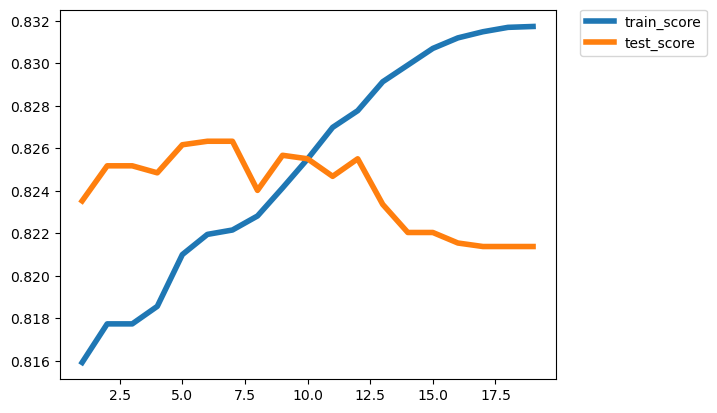

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
test_score,0.823529,0.825182,0.825182,0.824851,0.826173,0.826338,0.826338,0.824025,0.825677,0.825512,0.824686,0.825512,0.823364,0.822042,0.822042,0.821547,0.821381,0.821381,0.821381
train_score,0.815921,0.817739,0.817739,0.818565,0.821002,0.821952,0.822159,0.822820,0.824142,0.825505,0.826992,0.827777,0.829140,0.829925,0.830710,0.831206,0.831495,0.831702,0.831743


In [ ]:
train_score, test_score = [],[]
rango_max=20
for depth in range(1,rango_max):
    tree_depth = DecisionTreeClassifier(random_state=0, 
                                max_depth=depth).fit(x_train2, y_train2)
    train_score.append(tree_depth.score(x_train2, y_train2))
    test_score.append(tree_depth.score(x_val, y_val))

plt.plot(range(1,rango_max), train_score, label="train_score", linewidth=4)
plt.plot(range(1,rango_max), test_score, label="test_score", linewidth=4)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()
pd.DataFrame({"test_score":test_score,
"train_score":train_score,}).T